# Mixed Layer Depth & Stratification

## Download packages

In [1]:
#% shift enter to run section
import pandas as pd
from tqdm._tqdm_notebook import tqdm_notebook
import numpy as np

from numpy import *
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
plt.style.use('ggplot')
import xarray as xr
from glob import glob
import netCDF4
from netCDF4 import Dataset
import matplotlib.mlab as mlab
import pylab
import pyreadr
import seaborn as sns
import tqdm
import tzlocal
import sys
import os
my_timezone = tzlocal.get_localzone().zone
#del()
import seawater as sw
import gsw

import scipy.interpolate as sc
from scipy import signal
my_timezone = tzlocal.get_localzone().zone
# pylab for more MATLAB like environment and inline displays plots below cells
%pylab inline

# if gsw Warning shows, manually install gsw if possible - will still work without
import glidertools as gt
from cmocean import cm as cmo  # we use this for colormaps
#del()
import geostatspy.GSLIB as GSLIB 
import geostatspy.geostats as geostats 
import scipy.stats   
from skgstat import Variogram
import pykrige

import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri

from itertools import product

summer = [0, 1, 2, 9, 10, 11, 12, 13, 14,21, 22, 23, 24, 25, 26,33, 34, 35, 36, 37, 38,45, 46, 47, 48, 49, 50,57, 58, 59, 60, 61, 62,69, 70, 71, 72, 73, 74,81, 82, 83]
winter = [3,4,5,6,7,8,15,16,17,18,19,20,27,28,29,30,31,32,39,40,41,42,43,44,51,52,53,54,55,56,63,64,65,66,67,68,75,76,77,78,79,80]

Populating the interactive namespace from numpy and matplotlib


C:\Users\Sean Evans\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['pylab']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [ ]:
sys.path.append('C:\\Users\\Sean Evans\\miniconda3\\envs\\my-iris\\Lib\\site-packages')
sys.path

In [ ]:
sys.version

## Load netcdf files

## Select region of interest by lat and lon

In [151]:
#lat_slicea=-52;lat_sliceb=-40;lon_slicea=20;lon_sliceb=50
lat_slicea=-60;lat_sliceb=-35;lon_slicea=15;lon_sliceb=55

In [152]:
flist = "C:/Users/Sean Evans/Documents/2020/MSc/Data/Objective analysis UK metoffice/EN.4.2.1.f.analysis.g10.20*.nc"
flist = glob(flist)
#file 1
for i in tqdm_notebook(list(range(len(flist)))):
    if i==0:
        xds = xr.open_dataset(flist[i])
        xds = xds.sel(lon=slice(lon_slicea, lon_sliceb),lat=slice(lat_slicea, lat_sliceb))
        time = xds.time.values
        temp = xds.sel(lon=slice(lon_slicea, lon_sliceb),lat=slice(lat_slicea, lat_sliceb)).temperature
        sal = xds.sel(lon=slice(lon_slicea, lon_sliceb),lat=slice(lat_slicea, lat_sliceb)).salinity
    else:
        xds1 = xr.open_dataset(flist[i])
        xds1 = xds1.sel(lon=slice(lon_slicea, lon_sliceb),lat=slice(lat_slicea, lat_sliceb))
        time1 = xds1.time.values
        time = np.append(time,time1)
        temp1 = xds1.sel(lon=slice(lon_slicea, lon_sliceb),lat=slice(lat_slicea, lat_sliceb)).temperature
        temp = np.concatenate((temp,temp1),axis=0)
        sal1 = xds1.sel(lon=slice(lon_slicea, lon_sliceb),lat=slice(lat_slicea, lat_sliceb)).salinity
        sal = np.concatenate((sal,sal1),axis=0)
print(temp.shape)
print(sal.shape)


(84, 42, 26, 41)
(84, 42, 26, 41)


In [155]:
flist = "C:/Users/Sean Evans/Documents/2020/MSc/Data/Objective analysis UK metoffice/EN.4.2.1.f.analysis.g10.20*.nc"
flist = glob(flist)
summer = [0, 1, 2, 9, 10, 11, 12, 13, 14,21, 22, 23, 24, 25, 26,33, 34, 35, 36, 37, 38,45, 46, 47, 48, 49, 50,57, 58, 59, 60, 61, 62,69, 70, 71, 72, 73, 74,81, 82, 83]
winter = [3,4,5,6,7,8,15,16,17,18,19,20,27,28,29,30,31,32,39,40,41,42,43,44,51,52,53,54,55,56,63,64,65,66,67,68,75,76,77,78,79,80]
#file 1
for i in tqdm_notebook(list(range(len(flist)))):
    if i in summer:
        if i==0:
            xds = xr.open_dataset(flist[i])
            xds = xds.sel(lon=slice(lon_slicea, lon_sliceb),lat=slice(lat_slicea, lat_sliceb))
            summer_time = xds.time.values
            summer_temp = xds.sel(lon=slice(lon_slicea, lon_sliceb),lat=slice(lat_slicea, lat_sliceb)).temperature
            summer_sal = xds.sel(lon=slice(lon_slicea, lon_sliceb),lat=slice(lat_slicea, lat_sliceb)).salinity
        else:
            xds1 = xr.open_dataset(flist[i])
            xds1 = xds1.sel(lon=slice(lon_slicea, lon_sliceb),lat=slice(lat_slicea, lat_sliceb))
            summer_time1 = xds1.time.values
            summer_time = np.append(summer_time,summer_time1)
            summer_temp1 = xds1.sel(lon=slice(lon_slicea, lon_sliceb),lat=slice(lat_slicea, lat_sliceb)).temperature
            summer_temp = np.concatenate((summer_temp,summer_temp1),axis=0)
            summer_sal1 = xds.sel(lon=slice(lon_slicea, lon_sliceb),lat=slice(lat_slicea, lat_sliceb)).salinity
            summer_sal = np.concatenate((summer_sal,summer_sal1),axis=0)
    if i in winter:
        if i==3:
            xds = xr.open_dataset(flist[i])
            xds = xds.sel(lon=slice(lon_slicea, lon_sliceb),lat=slice(lat_slicea, lat_sliceb))
            winter_time = xds.time.values
            winter_temp = xds.sel(lon=slice(lon_slicea, lon_sliceb),lat=slice(lat_slicea, lat_sliceb)).temperature
            winter_sal = xds.sel(lon=slice(lon_slicea, lon_sliceb),lat=slice(lat_slicea, lat_sliceb)).salinity
        else:
            xds1 = xr.open_dataset(flist[i])
            xds1 = xds1.sel(lon=slice(lon_slicea, lon_sliceb),lat=slice(lat_slicea, lat_sliceb))
            winter_time1 = xds1.time.values
            winter_time = np.append(winter_time,winter_time1)
            winter_temp1 = xds1.sel(lon=slice(lon_slicea, lon_sliceb),lat=slice(lat_slicea, lat_sliceb)).temperature
            winter_temp = np.concatenate((winter_temp,winter_temp1),axis=0)
            winter_sal1 = xds.sel(lon=slice(lon_slicea, lon_sliceb),lat=slice(lat_slicea, lat_sliceb)).salinity
            winter_sal = np.concatenate((winter_sal,winter_sal1),axis=0)
print(summer_temp.shape)
print(summer_sal.shape)
print(winter_temp.shape)
print(winter_sal.shape)



(42, 42, 26, 41)
(42, 42, 26, 41)
(42, 42, 26, 41)
(42, 42, 26, 41)


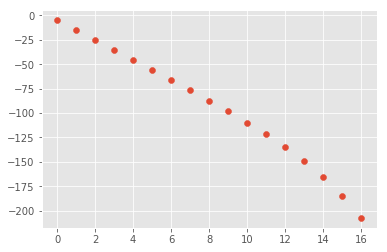

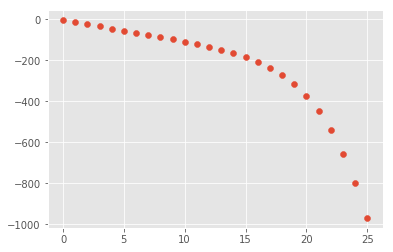

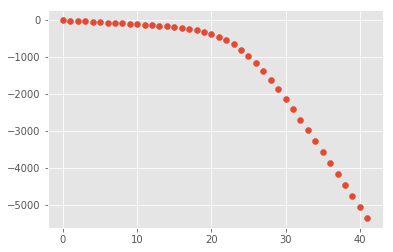

In [297]:
plt.show(plt.scatter(arange(0,42,1)[0:17],-xds1.depth.values[0:17]))
plt.show(plt.scatter(arange(0,42,1)[0:26],-xds1.depth.values[0:26]))
plt.show(plt.scatter(arange(0,42,1),-xds1.depth.values))
#%% Limit the 

In [156]:
Tarray = xr.DataArray(data=temp,dims=["time","depth","lat","lon"],
                 coords={"time": time,
                         "depth":xds.depth.values,
                         "lat":xds.lat.values,
                         "lon":xds.lon.values                                                  
                        })
Tmld_init = Tarray[:,slice(0,26),:,:]

In [157]:
Tarray_summer = xr.DataArray(data=summer_temp,dims=["time","depth","lat","lon"],
                 coords={"time": summer_time,
                         "depth":xds.depth.values,
                         "lat":xds.lat.values,
                         "lon":xds.lon.values                                                  
                        })
Tmld_init_summer = Tarray_summer[:,slice(0,26),:,:]

Tarray_winter = xr.DataArray(data=winter_temp,dims=["time","depth","lat","lon"],
                 coords={"time": winter_time,
                         "depth":xds.depth.values,
                         "lat":xds.lat.values,
                         "lon":xds.lon.values                                                  
                        })
Tmld_init_winter = Tarray_winter[:,slice(0,26),:,:]

In [158]:
Sarray = xr.DataArray(data=sal,dims=["time","depth","lat","lon"],
                 coords={"time": time,
                         "depth":xds.depth.values,
                         "lat":xds.lat.values,
                         "lon":xds.lon.values                                                  
                        })
                        
Smld_init = Sarray[:,slice(0,26),:,:]

In [8]:
xr.concat([Tarray, Sarray])


C:\Users\Sean Evans\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

the `dim` argument to `concat` will be required in a future version of xarray; for now, setting it to the old default of 'concat_dim'



<xarray.DataArray (concat_dims: 2, time: 84, depth: 42, lat: 26, lon: 41)>
array([[[[[273.20102 , ..., 273.9933  ],
          ...,
          [294.74698 , ..., 291.92194 ]],

         ...,

         [[272.39218 , ...,        nan],
          ...,
          [       nan, ...,        nan]]],


        ...,


        [[[272.10123 , ..., 272.42654 ],
          ...,
          [293.9897  , ..., 292.01324 ]],

         ...,

         [[272.42953 , ...,        nan],
          ...,
          [       nan, ...,        nan]]]],



       [[[[ 33.708046, ...,  33.88111 ],
          ...,
          [ 35.63678 , ...,  35.499012]],

         ...,

         [[ 34.650772, ...,        nan],
          ...,
          [       nan, ...,        nan]]],


        ...,


        [[[ 33.955284, ...,  33.637962],
          ...,
          [ 35.493126, ...,  35.489353]],

         ...,

         [[ 34.656883, ...,        nan],
          ...,
          [       nan, ...,        nan]]]]], dtype=float32)
Coordinates:
  * t

In [ ]:
#type(Tarray.groupby('time.month',squeeze=True))
#Tarray.DataArrayGroupBy(grouper='6M')#groupby([pd.Grouper(freq='6M', level='time')])
#xr.core.groupby.DataArrayGroupBy(Tarray,'time.month',grouper='1M').mean()
xr.core.groupby.DataArrayGroupBy(Tarray,'time.month') # https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html

## Gridding data for thermocline and mld analysis 

In [10]:
# * (to convert the list to a tuple of arguments)

custom_bin = np.r_[np.arange(0.5, 501, 1)]
#custom_bin = np.r_[np.arange(0.5, 1001, 1)]

depth = Tmld_init.depth.values
b = np.repeat(depth[:, np.newaxis], 84, axis=1)
c = np.repeat(b[:,:,np.newaxis],26,axis=2)
d = np.repeat(c[:,:,:,np.newaxis],41,axis=3)
D = np.swapaxes(d,0,1)
D = D.flatten() #ravel() will not make a copy of the original and may change if D output it modified

time = Tmld_init.time.values
b = np.repeat(time[:, np.newaxis], 26, axis=1)
c = np.repeat(b[:,:,np.newaxis],26,axis=2)
d = np.repeat(c[:,:,:,np.newaxis],41,axis=3)
Time = d.flatten()

temp = Tmld_init.values.flatten()

#Tmld_init_gridded = np.apply_along_axis(gt.grid_data(Time, D, Tmld_init.values.flatten(), bins=custom_bin),1,)
Tmld_init_gridded = gt.grid_data(Time, D, temp, bins=custom_bin)

#time, depth, lon, lat = np.meshgrid(Tmld_init.time.values,Tmld_init.depth.values,Tmld_init.lon.values,Tmld_init.lat.values)
#time, depth, lon, lat = np.meshgrid(Tmld_init.time.values,custom_bin,Tmld_init.lon.values,Tmld_init.lat.values)
#time = np.swapaxes(time,0,1)
#depth = np.swapaxes(depth,0,1)
#lon = np.swapaxes(lon,0,1)
#lat = np.swapaxes(lat,0,1)

#gsw.indexer()

Mean bin size = 1.00
Mean depth binned (50 m) vertical sampling frequency = 0.00


C:\Users\Sean Evans\Anaconda3\lib\site-packages\glidertools\helpers.py:69: GliderToolsWarning:

Primary input variable is not xr.DataArray data type - no metadata to pass on.



In [ ]:
#from regrid2 import Regridder
#import cdms2
#import iris
sys.path
#result = ta.pressureRegrid(cdms2.createAxis([1000.0])).rgrd(positionIn=(lon,lat,depth,time))
#Tmld_init

## Interpolation function

In [ ]:
def interpLevel(grid,value,data,interp='linear'):
    """
    Interpolate 3d data to a common z coordinate.

    Can be used to calculate the wind/pv/whatsoever values for a common
    potential temperature / pressure level.

    grid : numpy.ndarray
       The grid. For example the potential temperature values for the whole 3d
       grid.

    value : float
       The common value in the grid, to which the data shall be interpolated.
       For example, 350.0

    data : numpy.ndarray
       The data which shall be interpolated. For example, the PV values for
       the whole 3d grid.

    kind : str
       This indicates which kind of interpolation will be done. It is directly
       passed on to scipy.interpolate.interp1d().

    returns : numpy.ndarray
       A 2d array containing the *data* values at *value*.

    """
    ret = np.zeros_like(data[0,:,:])
    for yIdx in xrange(grid.shape[1]):
        for xIdx in xrange(grid.shape[2]):
            # check if we need to flip the column
            if grid[0,yIdx,xIdx] > grid[-1,yIdx,xIdx]:
                ind = -1
            else:
                ind = 1
            f = interpolate.interp1d(grid[::ind,yIdx,xIdx], \
                data[::ind,yIdx,xIdx], \
                kind=interp)
            ret[yIdx,xIdx] = f(value)
    return ret

## Storing files for next notebook session

In [ ]:
%store flist 
%store xds
%store xds1
%store temp
%store sal
%store temp1
%store Tarray
%store time
%store Tmld_init
%store Tarray_summer
%store Tmld_init_summer
%store Tarray_winter
%store Tmld_init_winter
%store Sarray
%store Smld_init

## Practice

In [ ]:
M=time.astype('datetime64[M]')

In [ ]:
M2009S = M[:3]
M2009W = M[3:9]
M2009_10S = M[9:15]
M2010W =  M[15:21]
M2010_11S = M[21:27]
M2011W = M[27:33]
M2011_12S = M[33:39]
M2012S = M[39:45]
M2012_13S = M[45:51]
M2013W = M[51:57]
M2013_14S = M[57:63]
M2014W = M[63:69]
M2014_15S = M[69:75]
M2015W = M[75:81]
M2015S = M[81:84]

Summer = np.concatenate((M2009S,M2009_10S,M2010_11S,M2011_12S,M2012_13S,M2013_14S,M2014_15S))
Winter = np.concatenate((M2009W,M2010W,M2011W,M2012S,M2013W,M2014W,M2015W))

## Restoring files from previous notebook session

In [12]:
%store -r flist
%store -r xds
%store -r xds1
%store -r temp
%store -r temp1
%store -r time
%store -r Tarray
%store -r Tmld
%store -r Tmld_init
%store -r Tarray_summer
%store -r Tmld_init_summer
%store -r Tarray_winter
%store -r Tmld_init_winter
%store -r Sarray
%store -r Smld_init

no stored variable Tmld


## Temp_diff MLD

In [ ]:
#%% Marcel function - one profile per time
def calc_mldM(var, dpt, den_lim=0.03, ref_dpt=10):

    """Calculate the mixed layer depth from the density/temperature difference method

    Args:
      var: temperature or density data file
      dpt: depth data

    Return:
        time series of the mixed layer depth

    Dependencies:
        numpy

    """
    import numpy as np

    mld = []
    for i, prof in enumerate(np.arange(len(var))):

        try:
            ref_dpt_ind = np.nanargmin(np.abs(dpt - ref_dpt)) # gets the index for the min value for depth ignoring Nan values.
            rho_diff = np.abs(var[prof, ref_dpt_ind:500] - var[prof, ref_dpt_ind])
            x = rho_diff - den_lim
            x = np.squeeze(np.where(x > 0))[0]
            mld_ind = x + ref_dpt_ind
            mld += dpt[mld_ind],

        except:
            mld += np.NaN,
            print('MLD not calculated: profile ' + str(i) + '. Setting to NaN')

    return mld

In [58]:
#%% Sean function - one profile per time, lat, lon
# This works for Tmld_init 
def calc_Tmld(var, T_diff_lim=0.25):

    """Calculate the mixed layer depth from the temperature difference method

    Args:
      var: temperature or density data file

    Return:
        MLD for each profile based on temperature difference

    Dependencies:
        numpy

    """
    import numpy as np
    mld=[]
    
    try:
        T_diff = np.abs(var - var[0])
        dpt_diff = np.abs(diff(dpt))
        T_diff = np.delete(T_diff,[0])
        rho_diff = T_diff/dpt_diff
        x = T_diff - T_diff_lim
        if len(x)>1:
            mld_ind = np.squeeze(np.where(x > 0))[0] #Remove single-dimensional entries from the shape of an array.
            mld = dpt[mld_ind]
        else:
            mld_ind = np.squeeze(np.where(x > 0))
            mld = dpt[mld_ind]
    except:
        mld = np.NaN
        #print('MLD not calculated: profile ' + str(i) + '. Setting to NaN')
    return mld


In [59]:
dpt = Tmld_init.depth.values
Tmld = np.apply_along_axis(calc_Tmld, 1, Tmld_init)

#MLDFun = np.vectorize(myfunc, otypes=[float])

In [60]:
dpt_summer = Tmld_init_summer.depth.values
Tmld_summer = np.apply_along_axis(calc_Tmld, 1, Tmld_init_summer)
dpt_winter = Tmld_init_winter.depth.values
Tmld_winter = np.apply_along_axis(calc_Tmld, 1, Tmld_init_winter)

In [129]:
mean_Tmld = np.apply_along_axis(axis=0,arr=Tmld,func1d=np.nanmean)
mean_Tmld_summer = np.apply_along_axis(axis=0,arr=Tmld_summer,func1d=np.nanmean)
mean_Tmld_winter = np.apply_along_axis(axis=0,arr=Tmld_winter,func1d=np.nanmean)

In [105]:
nan_Tmld = np.apply_along_axis(axis=0,arr=Tmld,func1d=np.isnan)
nan_Tmld_summer = np.apply_along_axis(axis=0,arr=Tmld_summer,func1d=np.isnan)
nan_Tmld_winter = np.apply_along_axis(axis=0,arr=Tmld_winter,func1d=np.isnan)
nan_Tmld.sum(0)

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 3, 3, 2, 2,
        0, 1, 1, 1, 0, 1, 3, 1, 2],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 2, 4, 4, 3, 3, 2,
        1, 1, 3, 4, 4, 5, 7, 8, 7],
       [5, 3, 2, 3, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 4, 6, 7, 6, 3, 1, 0,
        0, 0, 0, 1, 2, 5, 8, 6, 3],
       [2, 3, 4, 3, 4, 5, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 2, 4],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0,

## Seasonal differences in TMLD

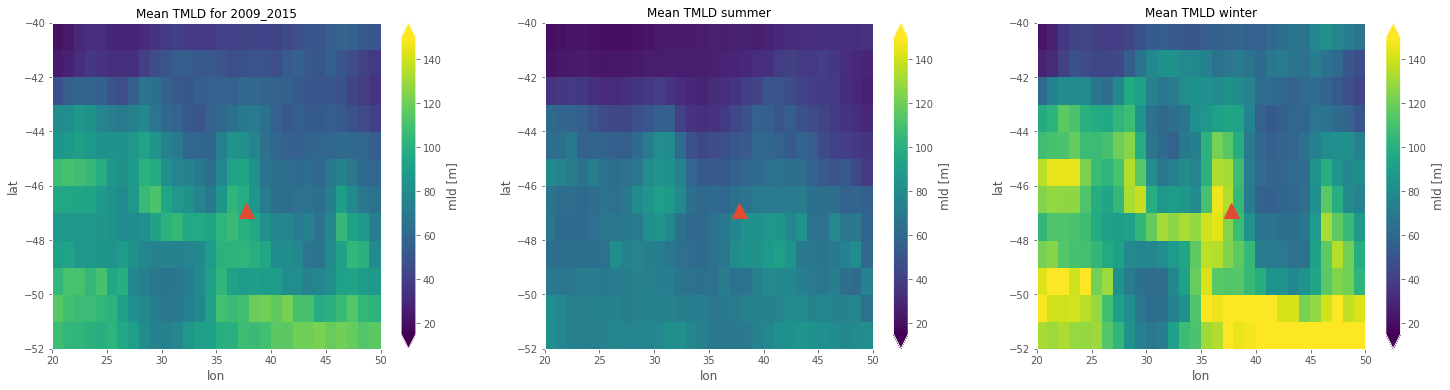

In [130]:
#f3 = plt.figure(figsize=(30,20))
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(25, 6), ncols=3)

plt.subplot(1, 3, 1)
plt.pcolormesh(Tmld_init.lon.values, Tmld_init.lat.values, mean_Tmld ,vmin = 15, vmax = 150)
plt.plot(37.73555555555556,-46.8886111,"^",ms=15)
plt.colorbar(extend='both').set_label('mld [m]')
plt.xlabel('lon')
plt.ylabel('lat')
plt.title('Mean TMLD for 2009_2015',fontsize=12)

plt.subplot(1, 3, 2)
plt.pcolormesh(Tmld_init_summer.lon.values, Tmld_init_summer.lat.values, mean_Tmld_summer, vmin = 15, vmax = 150)
plt.plot(37.73555555555556,-46.8886111,"^",ms=15)
plt.colorbar(extend='both').set_label('mld [m]')
plt.xlabel('lon')
plt.ylabel('lat')
plt.title('Mean TMLD summer',fontsize=12)

plt.subplot(1, 3, 3)
plt.pcolormesh(Tmld_init_winter.lon.values, Tmld_init_winter.lat.values, mean_Tmld_winter, vmin = 15, vmax = 150)
plt.plot(37.73555555555556,-46.8886111,"^",ms=15)
plt.colorbar(extend='both').set_label('mld [m]')
plt.xlabel('lon')
plt.ylabel('lat')
plt.title('Mean TMLD winter',fontsize=12)

plt.show()

## Potting temperature profile examples

Text(0.5,1,'Temp profile 35S winter')

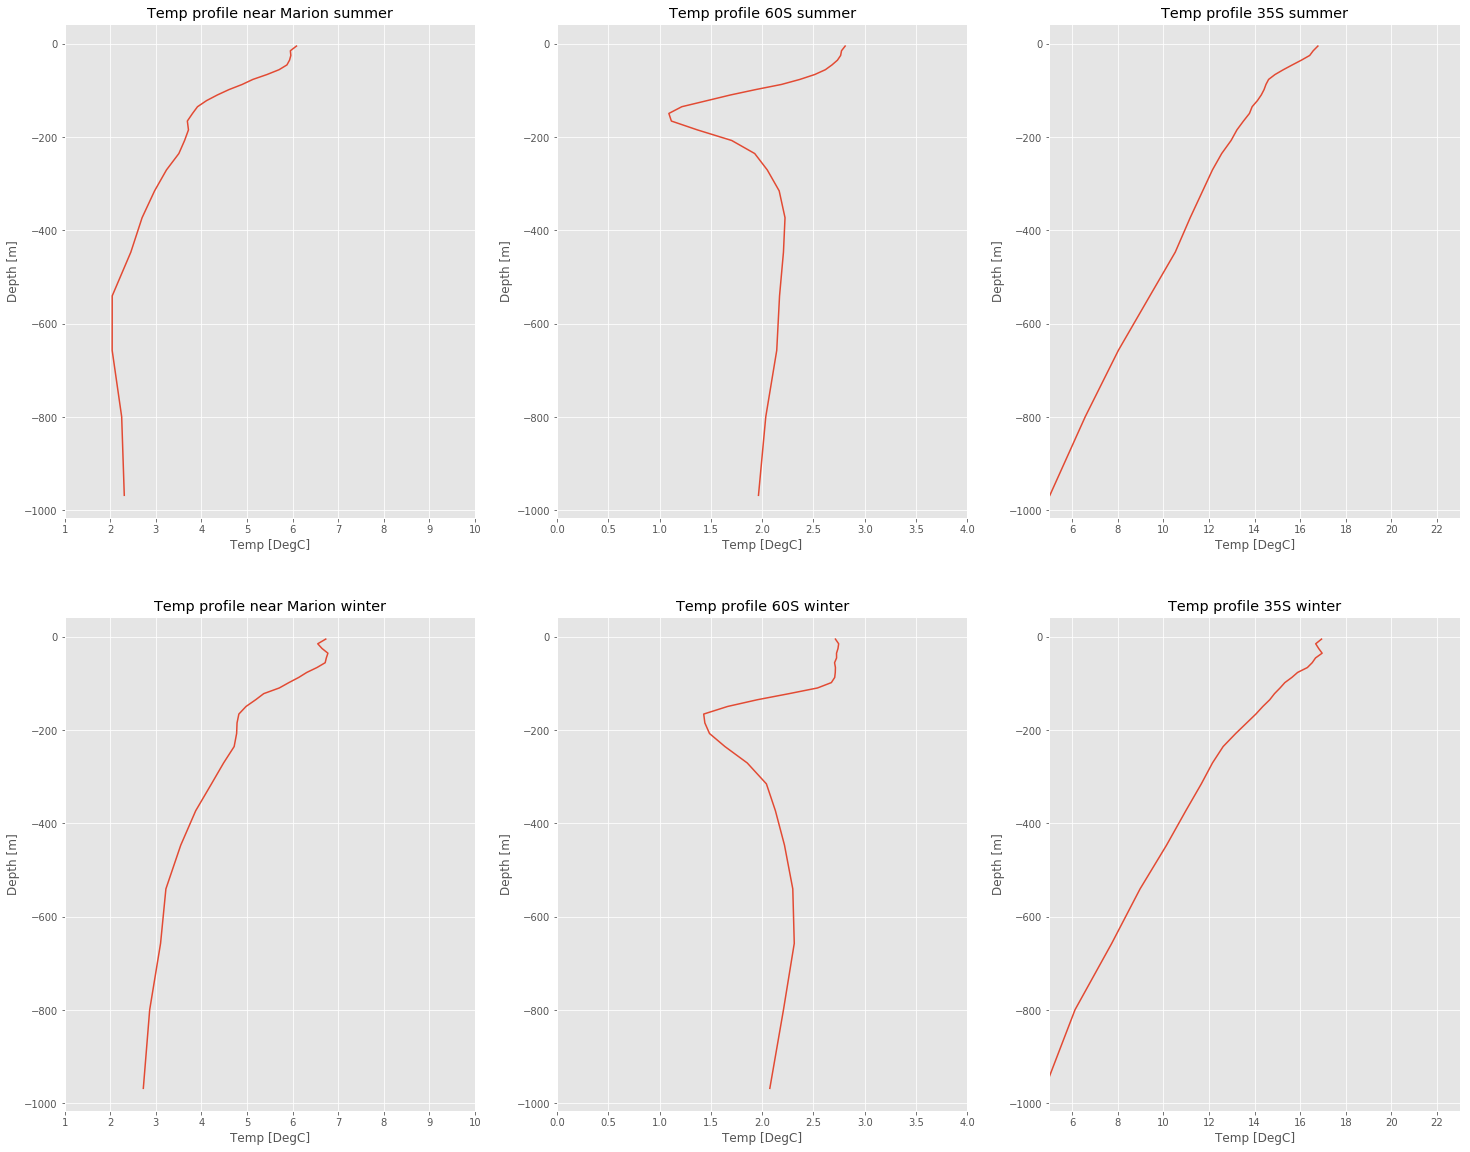

In [75]:
plt.subplots(figsize=(25, 20), ncols=3, nrows=2)

plt.subplot(2, 3, 1)
plt.plot(Tmld_init_summer[0,:,6,22].values-273.15,-Tmld_init_summer.depth.values)
plt.xlim(1,10)
plt.xlabel("Temp [DegC]")
plt.ylabel("Depth [m]")
plt.title("Temp profile near Marion summer")

plt.subplot(2, 3, 2)
plt.plot(Tmld_init_summer[0,:,0,22].values-273.15,-Tmld_init_summer.depth.values)
plt.xlim(-0,4)
plt.xlabel("Temp [DegC]")
plt.ylabel("Depth [m]")
plt.title("Temp profile 60S summer")

plt.subplot(2, 3, 3)
plt.plot(Tmld_init_summer[0,:,12,22].values-273.15,-Tmld_init_summer.depth.values)
plt.xlim(5,23)
plt.xlabel("Temp [DegC]")
plt.ylabel("Depth [m]")
plt.title("Temp profile 35S summer")

plt.subplot(2, 3, 4)
plt.plot(Tmld_init_winter[0,:,6,22].values-273.15,-Tmld_init_winter.depth.values)
plt.xlim(1,10)
plt.xlabel("Temp [DegC]")
plt.ylabel("Depth [m]")
plt.title("Temp profile near Marion winter")

plt.subplot(2, 3, 5)
plt.plot(Tmld_init_winter[0,:,0,22].values-273.15,-Tmld_init_winter.depth.values)
plt.xlim(-0,4)
plt.xlabel("Temp [DegC]")
plt.ylabel("Depth [m]")
plt.title("Temp profile 60S winter")

plt.subplot(2, 3, 6)
plt.plot(Tmld_init_winter[0,:,12,22].values-273.15,-Tmld_init_winter.depth.values)
plt.xlim(5,23)
plt.xlabel("Temp [DegC]")
plt.ylabel("Depth [m]")
plt.title("Temp profile 35S winter")

## Calculation of derived seawater properties

#### Example to test

In [76]:
# Should probably use gsw as that is the new and updated methods 
# https://teos-10.github.io/GSW-Python/density.html
# http://www.teos-10.org/pubs/gsw/html/gsw_contents.html
import gsw
import seawater as sw

# Will have to get depth for each profile
# Can do this using something like np.apply_along_axis(sw.pres(),1,Tmld_init)

p = sw.pres(Tmld_init.depth.values,Tmld_init.lat.values[0]) 
swd = sw.dens(Sarray[1,:,1,1][0:26], Tarray[1,:,1,1][0:26]-273.15, p[0:27])
print(swd)

#OR

gswd = gsw.density.rho_t_exact(Sarray[1,:,1,1][0:26], Tarray[1,:,1,1][0:26]-273.15, p[0:27])
print(gswd)

[1027.0874 1027.1293 1027.178  1027.2252 1027.282  1027.3191 1027.3838
 1027.4655 1027.56   1027.6329 1027.7231 1027.8112 1027.9065 1028.0116
 1028.1295 1028.2678 1028.4226 1028.6018 1028.8041 1029.0681 1029.3666
 1029.7557 1030.2429 1030.8267 1031.5333 1032.3369]
[1026.96080071 1027.00263156 1027.05140759 1027.09879348 1027.15540696
 1027.1926289  1027.25732906 1027.33888034 1027.43353554 1027.50630506
 1027.5964253  1027.68437665 1027.77962404 1027.88471923 1028.00236391
 1028.14034491 1028.29493557 1028.47369347 1028.67593401 1028.93976822
 1029.23807512 1029.62739222 1030.11430584 1030.6982038  1031.4052045
 1032.20918776]


In [ ]:
'''Prep for density calculations'''
p = sw.pres(Tmld_init.depth.values,median(Tmld_init.lat.values)) 
b = np.repeat(p[:, np.newaxis], 84, axis=1)
c = np.repeat(b[:,:,np.newaxis],26,axis=2)
d = np.repeat(c[:,:,:,np.newaxis],41,axis=3)
P = np.swapaxes(d,0,1)


S = Sarray[:,0:26,:,:]
T = Tarray[:,0:26,:,:]-273.15

CT = gsw.CT_from_t(S,T,P)
SA = gsw.SA_from_SP(S,P,median(Tmld_init.lat.values),median(Tmld_init.lon.values))

In [ ]:
#%% Cabbeling coefficient
cabbel_coef = gsw.cabbeling(SA,CT,P)
plt.plot(cabbel_coef[0,:1000,15,15])

## Calc seawater density using Salinity, Temperature and Pressure

### gswd using rho_t_exact

In [330]:
gswd1a = gsw.density.rho_t_exact(SA, T, P)-1000

### Rho Alpha and Beta for Brunt Vaisala equation

In [339]:
gswd_ab = gsw.density.rho_alpha_beta(SA, CT, P)
gswd2a = gswd_ab[0]
a = gswd_ab[1].mean(axis=0).mean(axis=0).mean(axis=0)[0]
b = gswd_ab[2].mean(axis=0).mean(axis=0).mean(axis=0)[0]

In [341]:
#np.apply_along_axis(nanmin,0,np.apply_along_axis(nanmin, 0, (gswd2[0]-gswd1))).min()

### sw_dens using sw.dens

In [ ]:
swd = sw.dens(S, T, P)


In [ ]:
swd[1,:,1,1]-gswd[1,:,1,1]

### Potential density

In [303]:
gswpd = gsw.density.sigma1(S, T)

In [306]:
#%% A DataArray is for a single variable, a Dataset is for multivariable xarrays
rhoarray = xr.DataArray(data=gswpd,dims=["time","depth","lat","lon"],
                 coords={"time": time,
                         "depth":xds.depth.values,#[slice(0,26)],
                         "lat":xds.lat.values,
                         "lon":xds.lon.values                                                  
                        })
mld_init = rhoarray[:,slice(0,26),:,:]
mld_init

ValueError: conflicting sizes for dimension 'depth': length 1000 on the data but length 42 on coordinate 'depth'

# MLD calculations using non-gridded dataset

In [ ]:
#%% Sean function - one profile per time, lat, lon
# This works for mld_init 
def calc_rhomld(var, den_lim=0.01):

    """Calculate the mixed layer depth from the temperature difference method

    Args:
      var: temperature or density data file

    Return:
        MLD for each profile based on temperature difference

    Dependencies:
        numpy

    """
    import numpy as np
    mld=[]
    
    try:
        rho_diff = np.abs(var - var[0])
        dpt_diff = np.abs(diff(dpt))
        rho_diff = np.delete(rho_diff,[0])
        rho_diff = rho_diff/dpt_diff
        x = rho_diff - den_lim
        if len(x)>1:
            mld_ind = np.squeeze(np.where(x > 0))[0] #Remove single-dimensional entries from the shape of an array.
            mld = dpt[mld_ind]
        else:
            mld_ind = np.squeeze(np.where(x > 0))
            mld = dpt[mld_ind]
    except:
        mld = np.NaN
        #print('MLD not calculated: profile ' + str(i) + '. Setting to NaN')
    return mld

In [ ]:
#%% Sean function - one profile per time, lat, lon
# This works for gswda 
def calc_rhomld(var):

    """Calculate the mixed layer depth from non_gridded dataset using deltad

    Args:
      var: temperature or density data file

    Return:
        MLD for each profile based on temperature difference

    Dependencies:
        numpy

    """
    import numpy as np
    den_lim=0.01 
    ref_dpt=10

    mld = []

    try:
        ref_dpt_ind = np.nanargmin(np.abs(dpt - ref_dpt))
        v = var[ref_dpt_ind:]
        d = dpt[ref_dpt_ind:]
        diff_ind = np.where(diff(v)>den_lim)[0][0] + ref_dpt_ind
        mld += d[diff_ind],

    except:
        mld += np.nan,

    return mld

In [ ]:
#%% Sean function - one profile per time, lat, lon
# This works for gswda 
def calc_rhomld_deltad(var):

    """Calculate the mixed layer depth from the temperature difference method

    Args:
      var: temperature or density data file

    Return:
        MLD for each profile based on temperature difference

    Dependencies:
        numpy

    """
    import numpy as np
    den_lim=0.01 
    ref_dpt=10

    mld = []

    try:
        ref_dpt_ind = np.nanargmin(np.abs(dpt - ref_dpt))
        v = var[ref_dpt_ind:]
        d = dpt[ref_dpt_ind:]
        diff_ind = np.where(diff(v)/diff(d)>den_lim)[0][0] + ref_dpt_ind
        mld += d[diff_ind],

    except:
        mld += np.nan,

    return mld

In [ ]:
#%% calc_rhomld_deltad
dpt = Tmld_init.depth.values
mld = np.apply_along_axis(calc_rhomld_deltad, 1, gswd)
mld = mld.squeeze(axis=1)

In [ ]:
#%% calc_rhomld
dpt = Tmld_init.depth.values
mld = np.apply_along_axis(calc_rhomld, 1, gswd)

In [ ]:
mean_mld = np.apply_along_axis(axis=0,arr=mld,func1d=np.nanmean)
median_mld = np.apply_along_axis(axis=0,arr=mld,func1d=np.nanmedian)
min_mld = np.apply_along_axis(axis=0,arr=mld,func1d=np.nanmin)
max_mld = np.apply_along_axis(axis=0,arr=mld,func1d=np.nanmax)
std_mld = np.apply_along_axis(axis=0,arr=mld,func1d=np.nanstd)

plt.subplots(figsize=(25, 20), ncols=2, nrows=3)


plt.subplot(3, 2, 1)
#f1 = plt.figure(figsize=(10,5))
plt.pcolormesh(Tmld_init.lon.values, Tmld_init.lat.values, mean_mld, vmin=0, vmax=160)
#plt.colorbar()
plt.colorbar(extend='both').set_label('mld [m]')
plt.plot(37.73555555555556,-46.8886111,"^",ms=15)
plt.title('MLD mean',fontsize=12)

plt.subplot(3, 2, 2)
#f1 = plt.figure(figsize=(10,5))
plt.pcolormesh(Tmld_init.lon.values, Tmld_init.lat.values, median_mld, vmin=0, vmax=160)
plt.colorbar()
plt.plot(37.73555555555556,-46.8886111,"^",ms=15)
plt.title('MLD median',fontsize=12)

plt.subplot(3, 2, 3)
#f1 = plt.figure(figsize=(10,5))
plt.pcolormesh(Tmld_init.lon.values, Tmld_init.lat.values, min_mld, vmin=0, vmax=160)
plt.colorbar()
plt.plot(37.73555555555556,-46.8886111,"^",ms=15)
plt.title('MLD min',fontsize=12)

plt.subplot(3, 2, 4)
#f1 = plt.figure(figsize=(10,5))
plt.pcolormesh(Tmld_init.lon.values, Tmld_init.lat.values, max_mld, vmin=0, vmax=160)
plt.colorbar()
plt.plot(37.73555555555556,-46.8886111,"^",ms=15)
plt.title('MLD max',fontsize=12)

plt.subplot(3, 2, 5)
#f1 = plt.figure(figsize=(10,5))
plt.pcolormesh(Tmld_init.lon.values, Tmld_init.lat.values, std_mld, vmin=0, vmax=160)
plt.colorbar()
plt.plot(37.73555555555556,-46.8886111,"^",ms=15)
plt.title('MLD std',fontsize=12)

## Seasonal MLD

In [ ]:
# Slicing/Indexing is represented as i:j:k, where i = from, j = to and k = step

summer = list([0, 1, 2, 9, 10, 11, 12, 13, 14,21, 22, 23, 24, 25, 26,33, 34, 35, 36, 37, 38,45, 46, 47, 48, 49, 50,57, 58, 59, 60, 61, 62,69, 70, 71, 72, 73, 74,81, 82, 83])
summer_mld = mld[summer,:,:]
winter = list([3,4,5,6,7,8,15,16,17,18,19,20,27,28,29,30,31,32,39,40,41,42,43,44,51,52,53,54,55,56,63,64,65,66,67,68,75,76,77,78,79,80])
winter_mld = mld[winter,:,:]

mean_mld_summer = np.apply_along_axis(axis=0,arr=summer_mld,func1d=np.nanmean)
median_mld_summer = np.apply_along_axis(axis=0,arr=summer_mld,func1d=np.nanmedian)
mean_mld_winter = np.apply_along_axis(axis=0,arr=winter_mld,func1d=np.nanmean)
median_mld_winter = np.apply_along_axis(axis=0,arr=winter_mld,func1d=np.nanmedian)

fig, (ax1, ax2, ax3) = plt.subplots(figsize=(25, 6), ncols=3)

plt.subplot(1, 3, 1)
plt.pcolormesh(mld_init.lon.values, mld_init.lat.values, mean_mld ,vmin = 15, vmax = 100)
plt.plot(37.73555555555556,-46.8886111,"^",ms=15)
plt.colorbar(extend='both').set_label('mld [m]')
plt.xlabel('lon')
plt.ylabel('lat')
plt.title('Mean MLD for 2009_2015',fontsize=12)

plt.subplot(1, 3, 2)
plt.pcolormesh(Tmld_init_summer.lon.values, Tmld_init_summer.lat.values, mean_mld_summer, vmin = 15, vmax = 100)
plt.plot(37.73555555555556,-46.8886111,"^",ms=15)
plt.colorbar(extend='both').set_label('mld [m]')
plt.xlabel('lon')
plt.ylabel('lat')
plt.title('Mean MLD summer',fontsize=12)

plt.subplot(1, 3, 3)
plt.pcolormesh(Tmld_init_winter.lon.values, Tmld_init_winter.lat.values, mean_mld_winter, vmin = 15, vmax = 100)
plt.plot(37.73555555555556,-46.8886111,"^",ms=15)
plt.colorbar(extend='both').set_label('mld [m]')
plt.xlabel('lon')
plt.ylabel('lat')
plt.title('Mean MLD winter',fontsize=12)

plt.show()

# Vertical stability!

# Calculating N_sq using addition of NT and Ns

## Calculating Nt

In [344]:
#%% Nt

#%% Sean function - one profile per time, lat, lon
# This works for Tmld_init 
def calc_Nt(var):

    """Calculate the mixed layer depth from the temperature difference method

    Args:
      var: temperature or density data file

    Return:
        MLD for each profile based on temperature difference

    Dependencies:
        numpy

    """
    import numpy as np
    Nt=[]

    try:
        T_diff = diff(var)/diff(dpt)
        nt = T_diff*(g*alpha)
        Nt += nt,
    except:
        Nt += np.NaN

    return Nt

In [349]:
g = 9.8
alpha = -0.0001155   
dpt = depth[:200]
Nt = np.apply_along_axis(calc_Nt, 1, PT[:,:200,:,:])
Nt = np.squeeze(Nt)

In [352]:
Summer_mean_Nt = np.apply_along_axis(axis=0,arr=Nt[summer,:,:,:],func1d=np.nanmean)
Winter_mean_Nt = np.apply_along_axis(axis=0,arr=Nt[winter,:,:,:],func1d=np.nanmean)
Year_mean_Nt = np.apply_along_axis(axis=0,arr=Nt,func1d=np.nanmean)

### Plotting Nt

Text(0.5,1,'Yearly mean Nt lat=-60')

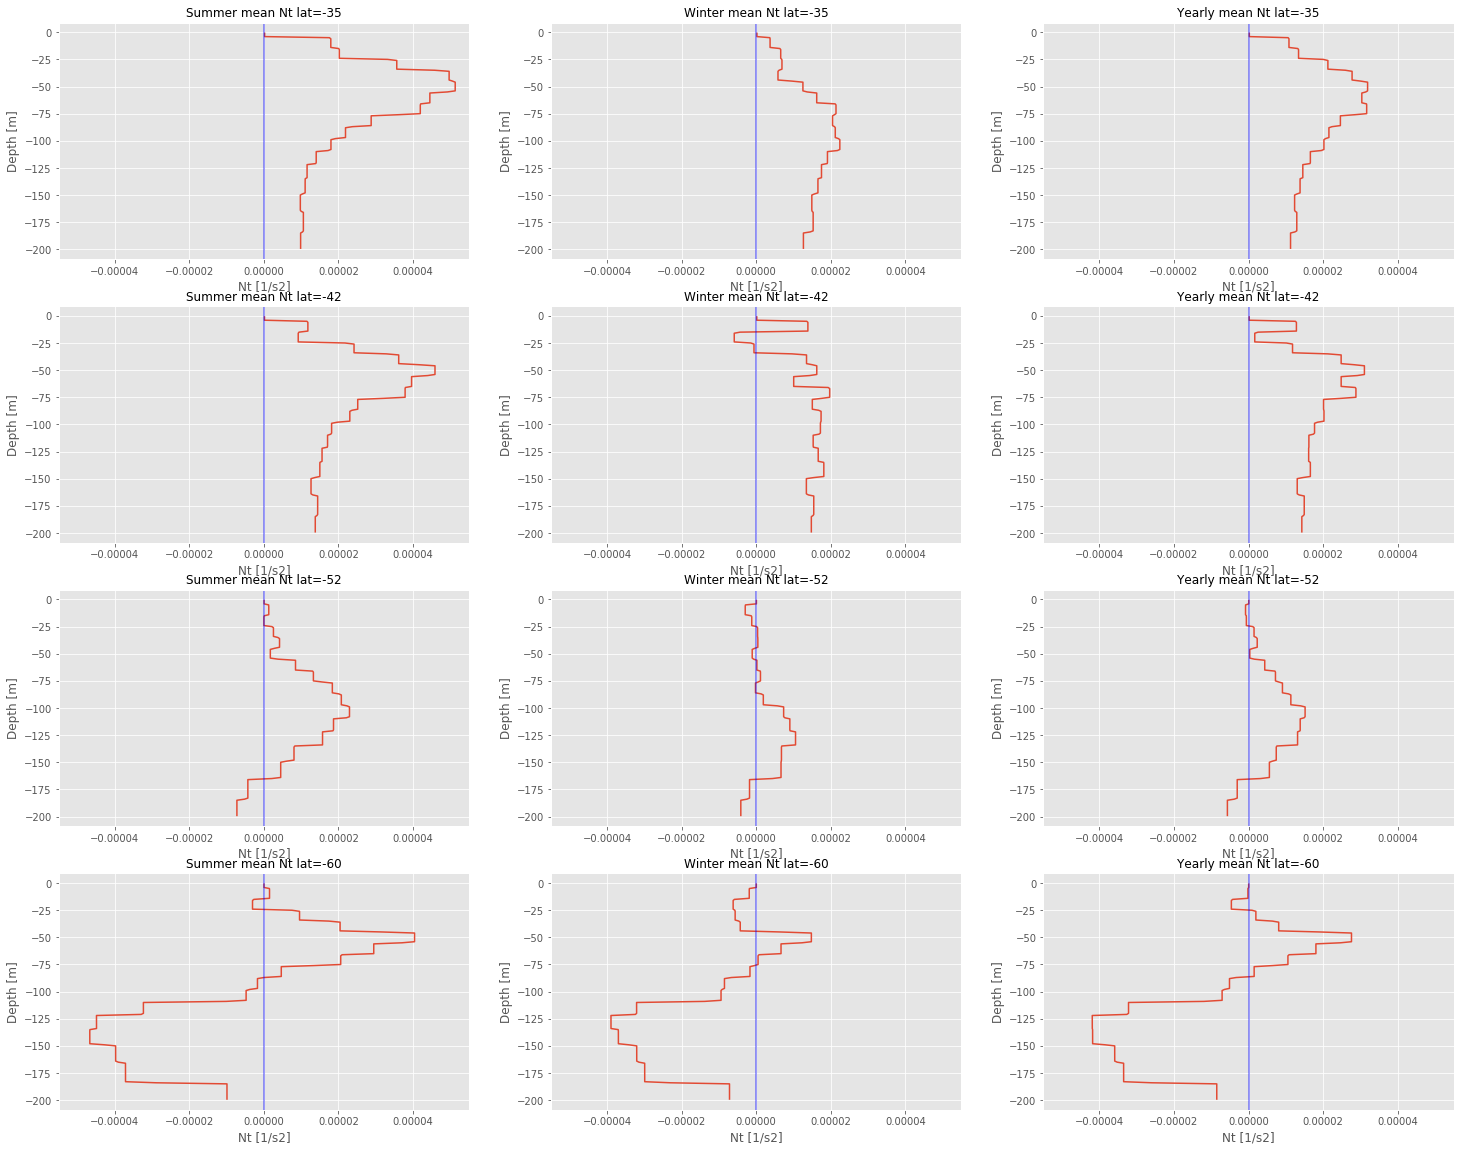

In [360]:
plt.subplots(figsize=(25, 20), ncols=3, nrows=3)

#%% Nt

plt.subplot(4, 3, 1)
plt.plot(Summer_mean_Nt[:,25,26],-depth[:199]) # -35 lat
plt.axvline(0,c='b',alpha=0.5)
plt.xlim(-0.000055,0.000055)
plt.ylabel('Depth [m]')
plt.xlabel('Nt [1/s2]')
plt.title('Summer mean Nt lat=-35',fontsize=12)

plt.subplot(4, 3, 2)
plt.plot(Winter_mean_Nt[:,25,26],-depth[:199])
plt.axvline(0,c='b',alpha=0.5)
plt.xlim(-0.000055,0.000055)
plt.ylabel('Depth [m]')
plt.xlabel('Nt [1/s2]')
plt.title('Winter mean Nt lat=-35',fontsize=12)

plt.subplot(4, 3, 3)
plt.plot(Year_mean_Nt[:,25,26],-depth[:199])
plt.axvline(0,c='b',alpha=0.5)
plt.xlim(-0.000055,0.000055)
plt.ylabel('Depth [m]')
plt.xlabel('Nt [1/s2]')
plt.title('Yearly mean Nt lat=-35',fontsize=12)

plt.subplot(4, 3, 4)
plt.plot(Summer_mean_Nt[:,19,26],-depth[:199])  # -42 lat
plt.axvline(0,c='b',alpha=0.5)
plt.xlim(-0.000055,0.000055)
plt.ylabel('Depth [m]')
plt.xlabel('Nt [1/s2]')
plt.title('Summer mean Nt lat=-42',fontsize=12)

plt.subplot(4, 3, 5)
plt.plot(Winter_mean_Nt[:,19,26],-depth[:199])
plt.axvline(0,c='b',alpha=0.5)
plt.xlim(-0.000055,0.000055)
plt.ylabel('Depth [m]')
plt.xlabel('Nt [1/s2]')
plt.title('Winter mean Nt lat=-42',fontsize=12)

plt.subplot(4, 3, 6)
plt.plot(Year_mean_Nt[:,19,26],-depth[:199])
plt.axvline(0,c='b',alpha=0.5)
plt.xlim(-0.000055,0.000055)
plt.ylabel('Depth [m]')
plt.xlabel('Nt [1/s2]')
plt.title('Yearly mean Nt lat=-42',fontsize=12)

plt.subplot(4, 3, 7)
plt.plot(Summer_mean_Nt[:,8,26],-depth[:199]) # -52 lat
plt.axvline(0,c='b',alpha=0.5)
plt.xlim(-0.000055,0.000055)
plt.ylabel('Depth [m]')
plt.xlabel('Nt [1/s2]')
plt.title('Summer mean Nt lat=-52',fontsize=12)

plt.subplot(4, 3, 8)
plt.plot(Winter_mean_Nt[:,8,26],-depth[:199])
plt.axvline(0,c='b',alpha=0.5)
plt.xlim(-0.000055,0.000055)
plt.ylabel('Depth [m]')
plt.xlabel('Nt [1/s2]')
plt.title('Winter mean Nt lat=-52',fontsize=12)

plt.subplot(4, 3, 9)
plt.plot(Year_mean_Nt[:,8,26],-depth[:199])
plt.axvline(0,c='b',alpha=0.5)
plt.xlim(-0.000055,0.000055)
plt.ylabel('Depth [m]')
plt.xlabel('Nt [1/s2]')
plt.title('Yearly mean Nt lat=-52',fontsize=12)

plt.subplot(4, 3, 10)
plt.plot(Summer_mean_Nt[:,0,26],-depth[:199]) # -60 lat, 40 lon
plt.axvline(0,c='b',alpha=0.5)
plt.xlim(-0.000055,0.000055)
plt.ylabel('Depth [m]')
plt.xlabel('Nt [1/s2]')
plt.title('Summer mean Nt lat=-60',fontsize=12)

plt.subplot(4, 3, 11)
plt.plot(Winter_mean_Nt[:,0,26],-depth[:199])
plt.axvline(0,c='b',alpha=0.5)
plt.xlim(-0.000055,0.000055)
plt.ylabel('Depth [m]')
plt.xlabel('Nt [1/s2]')
plt.title('Winter mean Nt lat=-60',fontsize=12)

plt.subplot(4, 3, 12)
plt.plot(Year_mean_Nt[:,0,26],-depth[:199])
plt.axvline(0,c='b',alpha=0.5)
plt.xlim(-0.000055,0.000055)
plt.ylabel('Depth [m]')
plt.xlabel('Nt [1/s2]')
plt.title('Yearly mean Nt lat=-60',fontsize=12)



## Calculating Ns

In [361]:
#%% Ns

#%% Sean function - one profile per time, lat, lon
# This works for Smld_init 
def calc_Ns(var):

    """Calculate the mixed layer depth from the temperature difference method

    Args:
      var: temperature or density data file

    Return:
        MLD for each profile based on temperature difference

    Dependencies:
        numpy

    """
    import numpy as np
    Ns=[]

    try:
        S_diff = diff(var)/diff(dpt)
        ns = S_diff*(-g*beta)
        Ns += ns,
    except:
        Ns += np.NaN

    return Ns

In [362]:
g = 9.8
beta = -0.000763
dpt = depth[:200]
Ns = np.apply_along_axis(calc_Ns, 1, SA[:,:200,:,:])
Ns = np.squeeze(Ns)

In [363]:
Summer_mean_Ns = np.apply_along_axis(axis=0,arr=Ns[summer,:,:,:],func1d=np.nanmean)
Winter_mean_Ns = np.apply_along_axis(axis=0,arr=Ns[winter,:,:,:],func1d=np.nanmean)
Year_mean_Ns = np.apply_along_axis(axis=0,arr=Ns,func1d=np.nanmean)

Text(0.5,1,'Yearly mean Ns lat=-60')

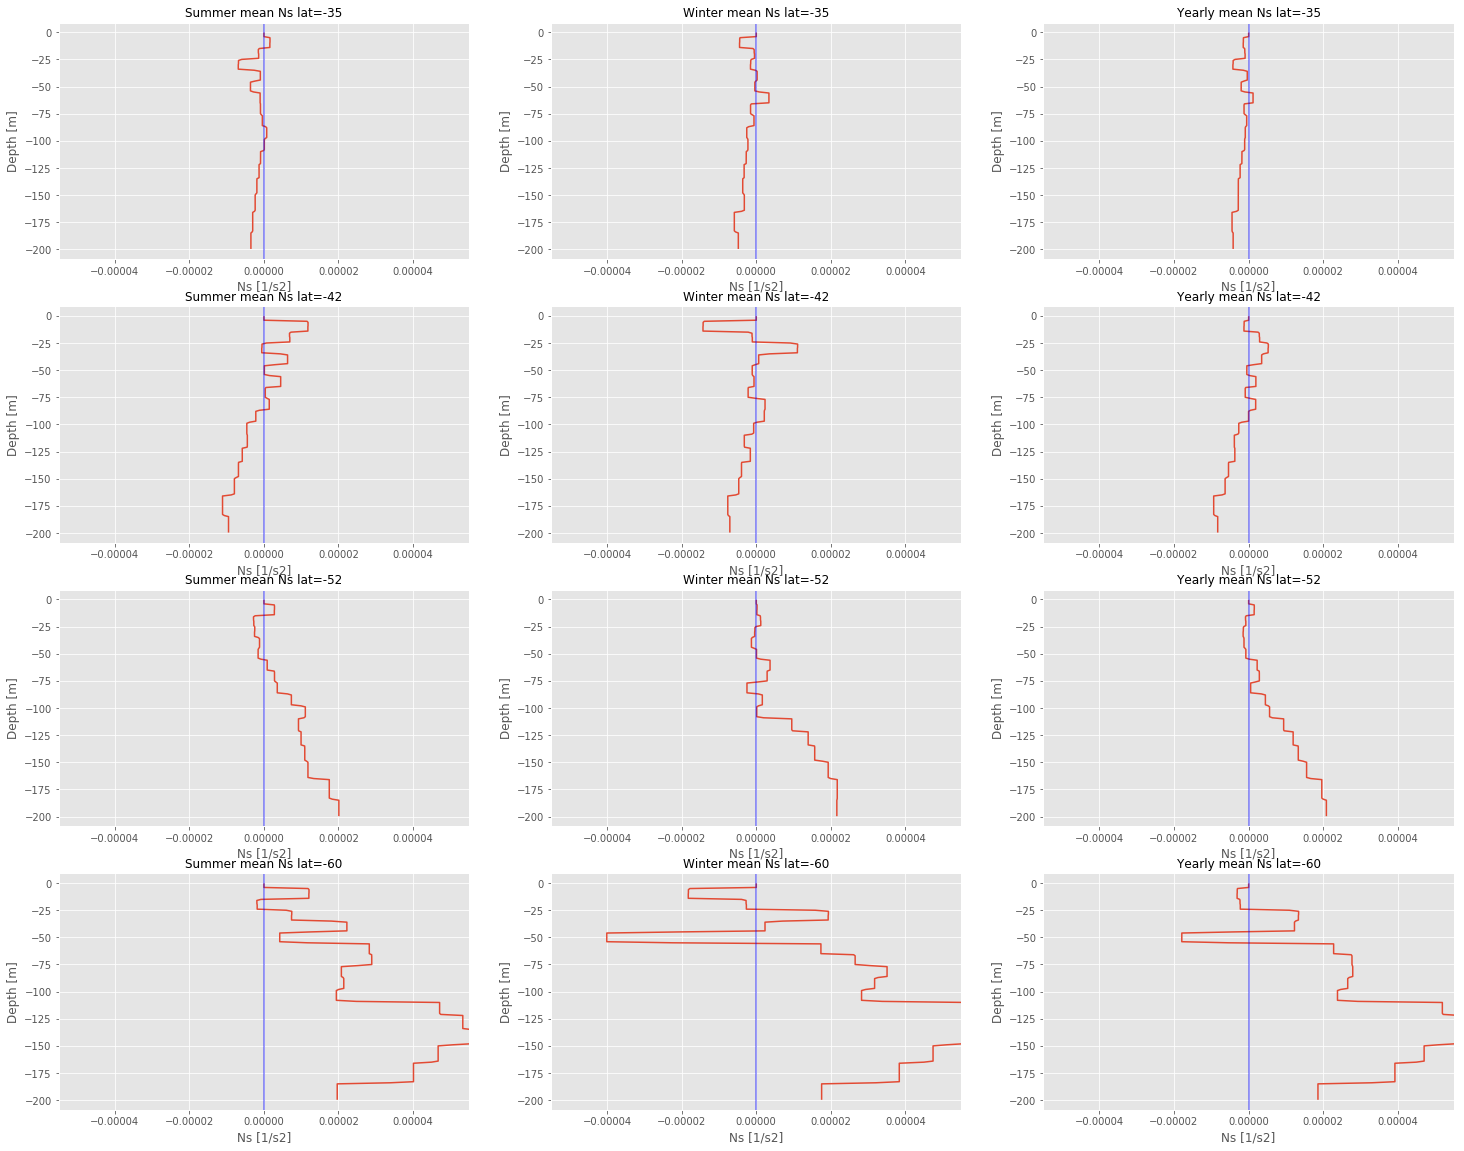

In [364]:
plt.subplots(figsize=(25, 20), ncols=3, nrows=3)

#%% Nt

plt.subplot(4, 3, 1)
plt.plot(Summer_mean_Ns[:,25,26],-depth[:199]) # -35 lat
plt.axvline(0,c='b',alpha=0.5)
plt.xlim(-0.000055,0.000055)
plt.ylabel('Depth [m]')
plt.xlabel('Ns [1/s2]')
plt.title('Summer mean Ns lat=-35',fontsize=12)

plt.subplot(4, 3, 2)
plt.plot(Winter_mean_Ns[:,25,26],-depth[:199])
plt.axvline(0,c='b',alpha=0.5)
plt.xlim(-0.000055,0.000055)
plt.ylabel('Depth [m]')
plt.xlabel('Ns [1/s2]')
plt.title('Winter mean Ns lat=-35',fontsize=12)

plt.subplot(4, 3, 3)
plt.plot(Year_mean_Ns[:,25,26],-depth[:199])
plt.axvline(0,c='b',alpha=0.5)
plt.xlim(-0.000055,0.000055)
plt.ylabel('Depth [m]')
plt.xlabel('Ns [1/s2]')
plt.title('Yearly mean Ns lat=-35',fontsize=12)

plt.subplot(4, 3, 4)
plt.plot(Summer_mean_Ns[:,19,26],-depth[:199])  # -42 lat
plt.axvline(0,c='b',alpha=0.5)
plt.xlim(-0.000055,0.000055)
plt.ylabel('Depth [m]')
plt.xlabel('Ns [1/s2]')
plt.title('Summer mean Ns lat=-42',fontsize=12)

plt.subplot(4, 3, 5)
plt.plot(Winter_mean_Ns[:,19,26],-depth[:199])
plt.axvline(0,c='b',alpha=0.5)
plt.xlim(-0.000055,0.000055)
plt.ylabel('Depth [m]')
plt.xlabel('Ns [1/s2]')
plt.title('Winter mean Ns lat=-42',fontsize=12)

plt.subplot(4, 3, 6)
plt.plot(Year_mean_Ns[:,19,26],-depth[:199])
plt.axvline(0,c='b',alpha=0.5)
plt.xlim(-0.000055,0.000055)
plt.ylabel('Depth [m]')
plt.xlabel('Ns [1/s2]')
plt.title('Yearly mean Ns lat=-42',fontsize=12)

plt.subplot(4, 3, 7)
plt.plot(Summer_mean_Ns[:,8,26],-depth[:199]) # -52 lat
plt.axvline(0,c='b',alpha=0.5)
plt.xlim(-0.000055,0.000055)
plt.ylabel('Depth [m]')
plt.xlabel('Ns [1/s2]')
plt.title('Summer mean Ns lat=-52',fontsize=12)

plt.subplot(4, 3, 8)
plt.plot(Winter_mean_Ns[:,8,26],-depth[:199])
plt.axvline(0,c='b',alpha=0.5)
plt.xlim(-0.000055,0.000055)
plt.ylabel('Depth [m]')
plt.xlabel('Ns [1/s2]')
plt.title('Winter mean Ns lat=-52',fontsize=12)

plt.subplot(4, 3, 9)
plt.plot(Year_mean_Ns[:,8,26],-depth[:199])
plt.axvline(0,c='b',alpha=0.5)
plt.xlim(-0.000055,0.000055)
plt.ylabel('Depth [m]')
plt.xlabel('Ns [1/s2]')
plt.title('Yearly mean Ns lat=-52',fontsize=12)

plt.subplot(4, 3, 10)
plt.plot(Summer_mean_Ns[:,0,26],-depth[:199]) # -60 lat, 40 lon
plt.axvline(0,c='b',alpha=0.5)
plt.xlim(-0.000055,0.000055)
plt.ylabel('Depth [m]')
plt.xlabel('Ns [1/s2]')
plt.title('Summer mean Ns lat=-60',fontsize=12)

plt.subplot(4, 3, 11)
plt.plot(Winter_mean_Ns[:,0,26],-depth[:199])
plt.axvline(0,c='b',alpha=0.5)
plt.xlim(-0.000055,0.000055)
plt.ylabel('Depth [m]')
plt.xlabel('Ns [1/s2]')
plt.title('Winter mean Ns lat=-60',fontsize=12)

plt.subplot(4, 3, 12)
plt.plot(Year_mean_Ns[:,0,26],-depth[:199])
plt.axvline(0,c='b',alpha=0.5)
plt.xlim(-0.000055,0.000055)
plt.ylabel('Depth [m]')
plt.xlabel('Ns [1/s2]')
plt.title('Yearly mean Ns lat=-60',fontsize=12)



In [383]:
N_sq = Nt+Ns
N_sq = np.squeeze(N_sq)

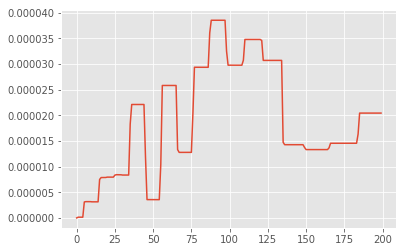

In [370]:
plt.plot(np.r_[0,N_sq[0,:,15,20]])

# N_sq calculated using potential density anomaly 

In [ ]:
#%% N_sq - vertical stability

#%% Sean function - one profile per time, lat, lon
# This works for Tmld_init 
def calc_N_sq(var):

    """Calculate the mixed layer depth from the temperature difference method

    Args:
      var: temperature or density data file

    Return:
        MLD for each profile based on temperature difference

    Dependencies:
        numpy

    """
    import numpy as np
    N_sq=[]

    try:
        rho = 1026#var[0]
        N_diff = diff(var)/diff(dpt)
        n = N_diff*(g/rho)
        N_sq += n,
    except:
        N_sq += np.NaN

    return N_sq

In [ ]:
g = 9.8
alpha = 0.000125
beta = 0.000762
dpt = depth[:300]
N_squar = np.apply_along_axis(calc_N_sq, 1, gswpd[:,:300,:,:]) # vertical stability
N_squar[0,:,:,0,0]

# Nsq calculated using the TEOS function

In [ ]:
Nsq = gsw.Nsquared(SA[:,:300,:,:],CT[:,:300,:,:],P[:,:300,:,:],axis=1)[0] # -10.1325??

In [ ]:
Summer_mean_Nsq = np.apply_along_axis(axis=0,arr=Nsq[summer,:,:,:],func1d=np.nanmean)
Winter_mean_Nsq = np.apply_along_axis(axis=0,arr=Nsq[winter,:,:,:],func1d=np.nanmean)
Year_mean_Nsq = np.apply_along_axis(axis=0,arr=Nsq,func1d=np.nanmean)

In [ ]:
plt.subplots(figsize=(25, 20), ncols=3, nrows=3)

#%% Ns
plt.subplot(3, 3, 1)
plt.plot(Summer_mean_Nsq[:,0,22],-depth[:299])
plt.axvline(0,c='b',alpha=0.5)
plt.xlim(-0.00005,0.00011)
plt.ylabel('Depth [m]')
plt.xlabel('Nsq [1/s2]')
plt.title('Summer mean Nsq lat=-60',fontsize=12)

plt.subplot(3, 3, 2)
plt.plot(Winter_mean_Nsq[:,0,22],-depth[:299])
plt.axvline(0,c='b',alpha=0.5)
plt.xlim(-0.00005,0.00011)
plt.ylabel('Depth [m]')
plt.xlabel('Nsq [1/s2]')
plt.title('Winter mean Nsq lat=-60',fontsize=12)

plt.subplot(3, 3, 3)
plt.plot(Year_mean_Nsq[:,0,22],-depth[:299])
plt.axvline(0,c='b',alpha=0.5)
plt.xlim(-0.00005,0.00011)
plt.ylabel('Depth [m]')
plt.xlabel('Nsq [1/s2]')
plt.title('Yearly mean Nsq lat=-60',fontsize=12)

plt.subplot(3, 3, 4)
plt.plot(Summer_mean_Nsq[:,15,22],-depth[:299])
plt.axvline(0,c='b',alpha=0.5)
plt.xlim(-0.00005,0.00011)
plt.ylabel('Depth [m]')
plt.xlabel('Nsq [1/s2]')
plt.title('Summer mean Nsq lat=-45',fontsize=12)

plt.subplot(3, 3, 5)
plt.plot(Winter_mean_Nsq[:,15,22],-depth[:299])
plt.axvline(0,c='b',alpha=0.5)
plt.xlim(-0.00005,0.00011)
plt.ylabel('Depth [m]')
plt.xlabel('Nsq [1/s2]')
plt.title('Winter mean Nsq lat=-45',fontsize=12)

plt.subplot(3, 3, 6)
plt.plot(Year_mean_Nsq[:,15,22],-depth[:299])
plt.axvline(0,c='b',alpha=0.5)
plt.xlim(-0.00005,0.00011)
plt.ylabel('Depth [m]')
plt.xlabel('Nsq [1/s2]')
plt.title('Yearly mean Nsq lat=-45',fontsize=12)

plt.subplot(3, 3, 7)
plt.plot(Summer_mean_Nsq[:,25,22],-depth[:299])
plt.axvline(0,c='b',alpha=0.5)
plt.xlim(-0.00005,0.00011)
plt.ylabel('Depth [m]')
plt.xlabel('Nsq [1/s2]')
plt.title('Summer mean Nsq lat=-35',fontsize=12)

plt.subplot(3, 3, 8)
plt.plot(Winter_mean_Nsq[:,25,22],-depth[:299])
plt.axvline(0,c='b',alpha=0.5)
plt.xlim(-0.00005,0.00011)
plt.ylabel('Depth [m]')
plt.xlabel('Nsq [1/s2]')
plt.title('Winter mean Nsq lat=-35',fontsize=12)

plt.subplot(3, 3, 9)
plt.plot(Year_mean_Nsq[:,25,22],-depth[:299])
plt.axvline(0,c='b',alpha=0.5)
plt.xlim(-0.00005,0.00011)
plt.ylabel('Depth [m]')
plt.xlabel('Nsq [1/s2]')
plt.title('Yearly mean Nsq lat=-35',fontsize=12)

## Plotting all methods

In [ ]:
plt.subplots(figsize=(25, 20), ncols=3, nrows=3)


plt.subplot(3, 3, 1)
plt.plot(Nsq[20,:300,0,22],-depth[:300])
plt.ylabel('Depth [m]')
plt.xlabel('Nsq [1/s2]')
plt.title('Nsq profile using potential density [lat=-60]',fontsize=12)

plt.subplot(3, 3, 2)
plt.plot(np.squeeze(N_sq)[20,:,0,22],-depth[:299])
plt.ylabel('Depth [m]')
plt.xlabel('Nsq [1/s2]')
plt.title('Nsq profile using NT & Ns [lat=-60]',fontsize=12)

plt.subplot(3, 3, 3)
plt.plot(np.squeeze(N_squar)[20,:,0,22],-depth[:299])
plt.ylabel('Depth [m]')
plt.xlabel('Nsq [1/s2]')
plt.title('Nsq profile using TEOS function [lat=-60]',fontsize=12)

plt.subplot(3, 3, 4)
plt.plot(Nsq[20,:300,15,22],-depth[:300])
plt.ylabel('Depth [m]')
plt.xlabel('Nsq [1/s2]')
plt.title('Nsq profile using potential density [lat=-45]',fontsize=12)

plt.subplot(3, 3, 5)
plt.plot(np.squeeze(N_sq)[20,:,15,22],-depth[:299])
plt.ylabel('Depth [m]')
plt.xlabel('Nsq [1/s2]')
plt.title('Nsq profile using NT & Ns [lat=-45]',fontsize=12)

plt.subplot(3, 3, 6)
plt.plot(np.squeeze(N_squar)[20,:,15,22],-depth[:299])
plt.ylabel('Depth [m]')
plt.xlabel('Nsq [1/s2]')
plt.title('Nsq profile using TEOS function [lat=-45]',fontsize=12)

plt.subplot(3, 3, 7)
plt.plot(Nsq[20,:300,25,22],-depth[:300])
plt.ylabel('Depth [m]')
plt.xlabel('Nsq [1/s2]')
plt.title('Nsq profile using potential density [lat=-35]',fontsize=12)

plt.subplot(3, 3, 8)
plt.plot(np.squeeze(N_sq)[20,:,25,22],-depth[:299])
plt.ylabel('Depth [m]')
plt.xlabel('Nsq [1/s2]')
plt.title('Nsq profile using NT & Ns [lat=-35]',fontsize=12)

plt.subplot(3, 3, 9)
plt.plot(np.squeeze(N_squar)[20,:,25,22],-depth[:299])
plt.ylabel('Depth [m]')
plt.xlabel('Nsq [1/s2]')
plt.title('Nsq profile using TEOS function [lat=-35]',fontsize=12)

## Square root the answer to get N

In [375]:
# N Buoyancy or Brunt-Väisälä Frequency -  vertical stability is proportional to the square of it (N^2 or N_sq)
N = (np.sqrt(np.abs(N_sq))/2*pi)*(N_sq/np.abs(N_sq)) # Natural oscillation frequency the water parcel 
freq = N/2*pi

### Plotting N

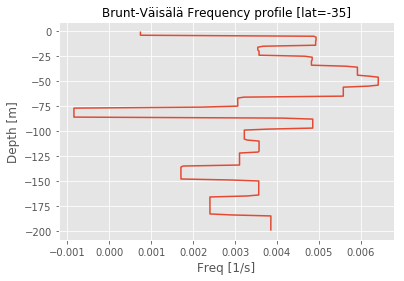

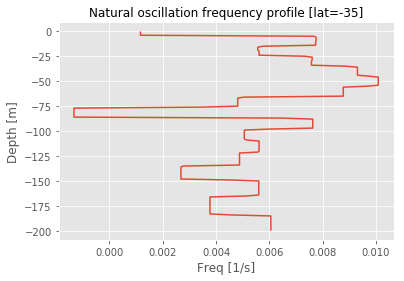

In [377]:
plt.plot(np.squeeze(N)[20,:,25,22],-depth[:199])
plt.ylabel('Depth [m]')
plt.xlabel('Freq [1/s]')
plt.title('Brunt-Väisälä Frequency profile [lat=-35]',fontsize=12)
plt.show()

plt.plot(np.squeeze(freq)[20,:,25,22],-depth[:199])
plt.ylabel('Depth [m]')
plt.xlabel('Freq [1/s]')
plt.title('Natural oscillation frequency profile [lat=-35]',fontsize=12)
plt.show()

## Calculating Nsq at base of the mixed layer

In [384]:
ntime, nlat, nlon = mld_gswda.shape
mld_base_Nsq = np.empty((ntime, nlat, nlon))

for time in tqdm_notebook(list(range(ntime))):
    for lat in range(nlat):
        for lon in range(nlon):
            try:
                mld_base_Nsq[time, lat, lon] = np.nanmean(Nsq[time,np.int(mld_gswda[time, lat, lon]):np.int(mld_gswda[time, lat, lon])+15,lat,lon])
            except:
                mld_base_Nsq[time, lat, lon] = np.NaN

mld_base_N_sq = np.empty((ntime, nlat, nlon))

for time in tqdm_notebook(list(range(ntime))):
    for lat in range(nlat):
        for lon in range(nlon):
            try:
                mld_base_N_sq[time, lat, lon] = np.nanmean(N_sq[time,np.int(mld_gswda[time, lat, lon]):np.int(mld_gswda[time, lat, lon])+15,lat,lon])
            except:
                mld_base_N_sq[time, lat, lon] = np.NaN

## Calculating Nt & Ns at base of the mixed layer

In [379]:
ntime, nlat, nlon = mld_gswda.shape
mld_base_Nt = np.empty((ntime, nlat, nlon))

for time in tqdm_notebook(list(range(ntime))):
    for lat in range(nlat):
        for lon in range(nlon):
            try:
                mld_base_Nt[time, lat, lon] = np.nanmean(Nt[time,np.int(mld_gswda[time, lat, lon]):np.int(mld_gswda[time, lat, lon])+15,lat,lon])
            except:
                mld_base_Nt[time, lat, lon] = np.NaN

mld_base_Ns = np.empty((ntime, nlat, nlon))

for time in tqdm_notebook(list(range(ntime))):
    for lat in range(nlat):
        for lon in range(nlon):
            try:
                mld_base_Ns[time, lat, lon] = np.nanmean(Ns[time,np.int(mld_gswda[time, lat, lon]):np.int(mld_gswda[time, lat, lon])+15,lat,lon])
            except:
                mld_base_Ns[time, lat, lon] = np.NaN

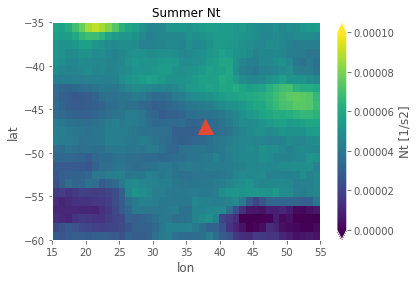

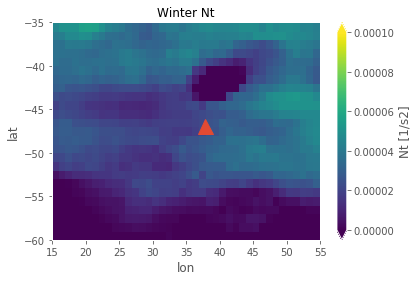

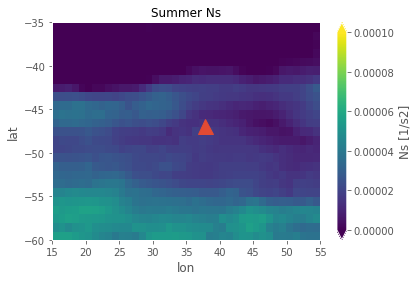

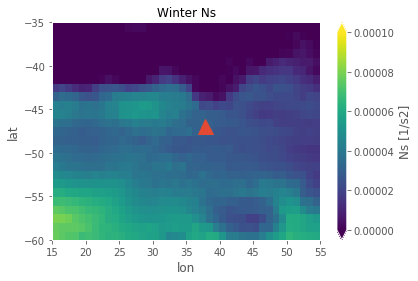

In [380]:
Summer_mld_base_Nt = np.apply_along_axis(axis=0,arr=mld_base_Nt[summer],func1d=np.nanmean)

plt.pcolormesh(Tmld_init.lon.values, Tmld_init.lat.values, Summer_mld_base_Nt, vmin=0, vmax=0.00010)
plt.colorbar(extend='both').set_label('Nt [1/s2]')
plt.ylabel('lat')
plt.xlabel('lon')
plt.plot(37.73555555555556,-46.8886111,"^",ms=15)
plt.title('Summer Nt',fontsize=12)
plt.show()

Winter_mld_base_Nt = np.apply_along_axis(axis=0,arr=mld_base_Nt[winter],func1d=np.nanmean)

plt.pcolormesh(Tmld_init.lon.values, Tmld_init.lat.values, Winter_mld_base_Nt, vmin=0, vmax=0.00010)
plt.colorbar(extend='both').set_label('Nt [1/s2]')
plt.ylabel('lat')
plt.xlabel('lon')
plt.plot(37.73555555555556,-46.8886111,"^",ms=15)
plt.title('Winter Nt',fontsize=12)
plt.show()

Summer_mld_base_Ns = np.apply_along_axis(axis=0,arr=mld_base_Ns[summer],func1d=np.nanmean)

plt.pcolormesh(Tmld_init.lon.values, Tmld_init.lat.values, Summer_mld_base_Ns, vmin=0, vmax=0.00010)
plt.colorbar(extend='both').set_label('Ns [1/s2]')
plt.ylabel('lat')
plt.xlabel('lon')
plt.plot(37.73555555555556,-46.8886111,"^",ms=15)
plt.title('Summer Ns',fontsize=12)
plt.show()

Winter_mld_base_Ns = np.apply_along_axis(axis=0,arr=mld_base_Ns[winter],func1d=np.nanmean)

plt.pcolormesh(Tmld_init.lon.values, Tmld_init.lat.values, Winter_mld_base_Ns, vmin=0, vmax=0.00010)
plt.colorbar(extend='both').set_label('Ns [1/s2]')
plt.ylabel('lat')
plt.xlabel('lon')
plt.plot(37.73555555555556,-46.8886111,"^",ms=15)
plt.title('Winter Ns',fontsize=12)
plt.show()

### S&T vertical gradient contribution to Nsq

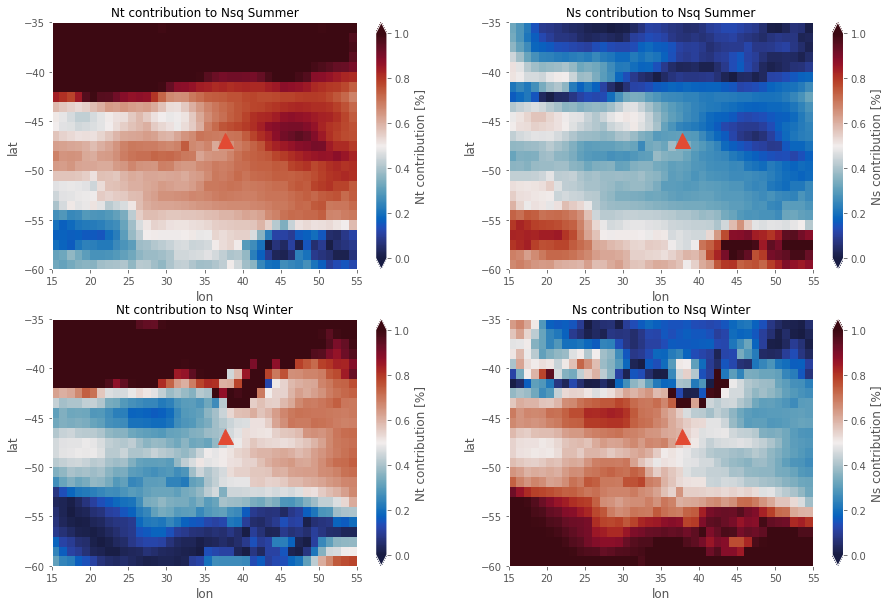

In [391]:
Summer_mld_base_N_sq = np.apply_along_axis(axis=0,arr=mld_base_N_sq[summer],func1d=np.nanmean)
Winter_mld_base_N_sq = np.apply_along_axis(axis=0,arr=mld_base_N_sq[winter],func1d=np.nanmean)

plt.subplots(figsize=(15, 10), ncols=2, nrows=2)

plt.subplot(2, 2, 1)
plt.pcolormesh(Tmld_init.lon.values, Tmld_init.lat.values, np.abs(Summer_mld_base_Nt/Summer_mld_base_N_sq),cmap=cmo.balance,vmin=0, vmax=1)
plt.colorbar(extend='both').set_label('Nt contribution [%]')
plt.ylabel('lat')
plt.xlabel('lon')
plt.plot(37.73555555555556,-46.8886111,"^",ms=15)
plt.title('Nt contribution to Nsq Summer',fontsize=12)

plt.subplot(2, 2, 2)
plt.pcolormesh(Tmld_init.lon.values, Tmld_init.lat.values, np.abs(Summer_mld_base_Ns/Summer_mld_base_N_sq),cmap=cmo.balance,vmin=0, vmax=1)
plt.colorbar(extend='both').set_label('Ns contribution [%]')
plt.ylabel('lat')
plt.xlabel('lon')
plt.plot(37.73555555555556,-46.8886111,"^",ms=15)
plt.title('Ns contribution to Nsq Summer',fontsize=12)

plt.subplot(2, 2, 3)
plt.pcolormesh(Tmld_init.lon.values, Tmld_init.lat.values, np.abs(Winter_mld_base_Nt/Winter_mld_base_N_sq),cmap=cmo.balance,vmin=0, vmax=1)
plt.colorbar(extend='both').set_label('Nt contribution [%]')
plt.ylabel('lat')
plt.xlabel('lon')
plt.plot(37.73555555555556,-46.8886111,"^",ms=15)
plt.title('Nt contribution to Nsq Winter',fontsize=12)

plt.subplot(2, 2, 4)
plt.pcolormesh(Tmld_init.lon.values, Tmld_init.lat.values, np.abs(Winter_mld_base_Ns/Winter_mld_base_N_sq),cmap=cmo.balance,vmin=0, vmax=1)
plt.colorbar(extend='both').set_label('Ns contribution [%]')
plt.ylabel('lat')
plt.xlabel('lon')
plt.plot(37.73555555555556,-46.8886111,"^",ms=15)
plt.title('Ns contribution to Nsq Winter',fontsize=12)
plt.show()

### Seasonal Nsq

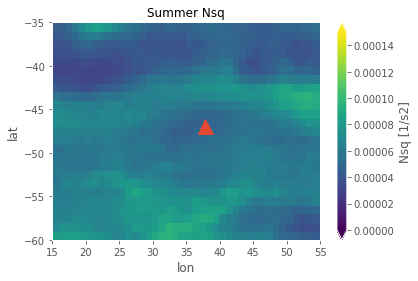

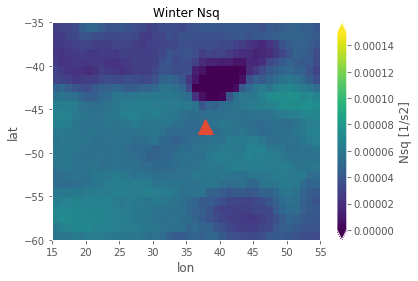

In [392]:
Summer_mld_base_Nsq = np.apply_along_axis(axis=0,arr=mld_base_N_sq[summer],func1d=np.nanmean)

plt.pcolormesh(Tmld_init.lon.values, Tmld_init.lat.values, Summer_mld_base_Nsq, vmin=0, vmax=0.00015)
plt.colorbar(extend='both').set_label('Nsq [1/s2]')
plt.ylabel('lat')
plt.xlabel('lon')
plt.plot(37.73555555555556,-46.8886111,"^",ms=15)
plt.title('Summer Nsq',fontsize=12)
plt.show()

Winter_mld_base_Nsq = np.apply_along_axis(axis=0,arr=mld_base_N_sq[winter],func1d=np.nanmean)

plt.pcolormesh(Tmld_init.lon.values, Tmld_init.lat.values, Winter_mld_base_Nsq, vmin=0, vmax=0.00015)
plt.colorbar(extend='both').set_label('Nsq [1/s2]')
plt.ylabel('lat')
plt.xlabel('lon')
plt.plot(37.73555555555556,-46.8886111,"^",ms=15)
plt.title('Winter Nsq',fontsize=12)
plt.show()

## R stability ratio

In [393]:
## Stability ratio - vertical contribution of temperature to the static stability (Nsq) 
Turner_Rsubrho = gsw.Turner_Rsubrho(SA[:,:200,:,:], CT[:,:200,:,:], P[:,:200,:,:], axis=1) # P - 10.1325 dbar

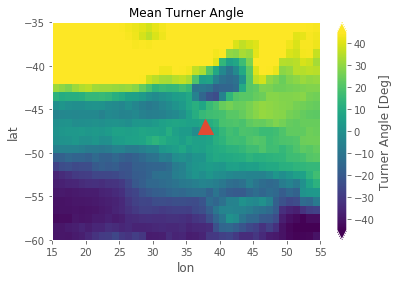

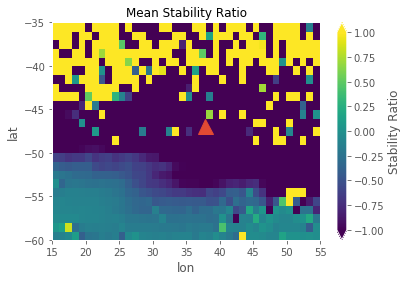

In [394]:
ntime, nlat, nlon = mld_gswda.shape
Turner_ml_base = np.empty((ntime, nlat, nlon))

for time in tqdm_notebook(list(range(ntime))):
    for lat in range(nlat):
        for lon in range(nlon):
            try:
                Turner_ml_base[time, lat, lon] = np.nanmean(Turner_Rsubrho[0][time,np.int(mld_gswda[time, lat, lon]):np.int(mld_gswda[time, lat, lon])+15,lat,lon])
            except:
                Turner_ml_base[time, lat, lon] = np.NaN

Rsubrho_ml_base = np.empty((ntime, nlat, nlon))

for time in tqdm_notebook(list(range(ntime))):
    for lat in range(nlat):
        for lon in range(nlon):
            try:
                Rsubrho_ml_base[time, lat, lon] = np.nanmean(Turner_Rsubrho[1][time,np.int(mld_gswda[time, lat, lon]):np.int(mld_gswda[time, lat, lon])+15,lat,lon])
            except:
                Rsubrho_ml_base[time, lat, lon] = np.NaN

Turner = np.apply_along_axis(axis=0,arr=Turner_ml_base,func1d=np.nanmean)
Rsubrho = np.apply_along_axis(axis=0,arr=Rsubrho_ml_base,func1d=np.nanmean)

plt.pcolormesh(Tmld_init.lon.values, Tmld_init.lat.values, Turner, vmin=-45, vmax=45)
plt.colorbar(extend='both').set_label('Turner Angle [Deg]')
plt.ylabel('lat')
plt.xlabel('lon')
plt.plot(37.73555555555556,-46.8886111,"^",ms=15)
plt.title('Mean Turner Angle',fontsize=12)
plt.show()

plt.pcolormesh(Tmld_init.lon.values, Tmld_init.lat.values, Rsubrho, vmin=-1, vmax=1)
plt.colorbar(extend='both').set_label('Stability Ratio')
plt.ylabel('lat')
plt.xlabel('lon')
plt.plot(37.73555555555556,-46.8886111,"^",ms=15)
plt.title('Mean Stability Ratio',fontsize=12)
plt.show()

In [ ]:
from itertools import product
data = Tmld_init.values
_, x_idx = np.unique(Tmld_init.lon.values, return_inverse=True)
_, y_idx = np.unique(Tmld_init.lat.values, return_inverse=True)
_, z_idx = np.unique(Tmld_init.depth.values, return_inverse=True)
_, w_idx = np.unique(Tmld_init.time.values, return_inverse=True)
point_idx = np.array(list(product(w_idx, z_idx, y_idx, x_idx)))
values = data[point_idx[:, 0], point_idx[:, 1], point_idx[:, 2], point_idx[:, 3]]
del(data)
new_z = np.r_[np.arange(1, 201, 1)]
new_points = np.array(list(product(w_idx, new_z, y_idx, x_idx)))
del(new_z)
new_values = sc.griddata(point_idx, values, new_points)

In [ ]:
# gsw.indexer() # - Generator of indexing tuples for “apply_along_axis” usage
# gsw.pchip_interp() # - Interpolate using Piecewise Cubic Hermite Interpolating Polynomial (shape preserving)

# Gridding and determining mlds

In [159]:
#%% Linear interpolation using 
ntime, ndepth_in, nlat, nlon = Tmld_init.shape
depth_out = np.r_[np.arange(1, 1001, 1)]
depth_in = Tmld_init.depth.values
ndepth_out = len(depth_out)
Tmld_init_gridded = np.empty((ntime, ndepth_out, nlat, nlon))

for time in tqdm_notebook(list(range(ntime))):
    for lat in range(nlat):
        for lon in range(nlon):
            Tmld_init_gridded[time, :, lat, lon] = np.interp(
                depth_out, depth_in, Tmld_init[time, :, lat, lon]
            )

#ntime, ndepth_in, nlat, nlon = Smld_init.shape
#depth_out = np.r_[np.arange(1, 1001, 1)]
#depth_in = Smld_init.depth.values
#ndepth_out = len(depth_out)
Smld_init_gridded = np.empty((ntime, ndepth_out, nlat, nlon))

for time in tqdm_notebook(list(range(ntime))):
    for lat in range(nlat):
        for lon in range(nlon):
            Smld_init_gridded[time, :, lat, lon] = np.interp(
                depth_out, depth_in, Smld_init[time, :, lat, lon]
            )

#%% ninterp1d method - needs extrapolation
#time, ndepth_in, nlat, nlon = Tmld_init.shape
#depths_in = Tmld_init.depth.values
#f_out = sc.interp1d(depths_in, Tmld_init, axis=1, kind='linear',bounds_error=False,fill_value="extrapolate")
#depths_out = np.r_[np.arange(0, 1001, 1)]
#Tmld_init_gridded = f_out(depths_out)

Smld_init_grid_xds = xr.DataArray(data=Smld_init_gridded,dims=["time","depth","lat","lon"],
                 coords={"time": Smld_init.time.values,
                         "depth":depth_out,
                         "lat":Smld_init.lat.values,
                         "lon":Smld_init.lon.values                                                  
                        })

Tmld_init_grid_xds = xr.DataArray(data=Tmld_init_gridded,dims=["time","depth","lat","lon"],
                 coords={"time": Tmld_init.time.values,
                         "depth":depth_out,
                         "lat":Tmld_init.lat.values,
                         "lon":Tmld_init.lon.values                                                  
                        })

## Calculation of derived Seawater properties

In [160]:
'''Prep for density calculations'''
p = sw.pres(depth_out,median(Tmld_init.lat.values)) 
b = np.repeat(p[:, np.newaxis], 84, axis=1)
c = np.repeat(b[:,:,np.newaxis],26,axis=2)
d = np.repeat(c[:,:,:,np.newaxis],41,axis=3)
P = np.swapaxes(d,0,1)

time = Tmld_init_grid_xds.time.values
depth = Tmld_init_grid_xds.depth.values
lat = Tmld_init_grid_xds.lat.values
lon = Tmld_init_grid_xds.lon.values

S = Smld_init_grid_xds
T = Tmld_init_grid_xds-273.15

CT = gsw.CT_from_t(S,T,P)
SA = gsw.SA_from_SP(S,P,median(lat),median(lon))
PT = gsw.pt0_from_t(SA,T,P)

#print(CT[1,0,15,22])
#print(T[1,0,15,22].values)
#print(lat[15])
#print(lon[22])
#print(T[0,0:20,0,0].values)
#print(PT[0,0:20,0,0])

## Calc seawater density using Salinity, Temperature and Pressure

In [161]:
gswda = gsw.density.rho_t_exact(SA,T,P)-1000

In [163]:
#%% Sean function - one profile per time, lat, lon
# This works for mld_init 
def calc_rhomld_grid(var):

    """Calculate the mixed layer depth from the density difference method

    Args:
      var: density data file

    Return:
        MLD for each profile based on temperature difference

    Dependencies:
        numpy

    """
    import numpy as np
    den_lim=0.01 
    ref_dpt=10

    mld_gswda = []

    try:
        ref_dpt_ind = np.nanargmin(np.abs(depth - ref_dpt))
        v = var[ref_dpt_ind:]
        d = depth[ref_dpt_ind:]
        diff_ind = np.where(diff(v)>den_lim)[0][0] + ref_dpt_ind
        mld_gswda += d[diff_ind],

    except:
        mld_gswda += np.nan,

    return mld_gswda

In [164]:
#np.apply_along_axis(diff,1,gswda)
mld_gswda = np.apply_along_axis(calc_rhomld_grid, 1, gswda)
#mld_gswda = np.squeeze(mld_gswda,axis=1)
mld_gswda = mld_gswda.clip(0,200).astype(float)
mld_gswda[mld_gswda==0] = np.nan
mld_gswda = mld_gswda.squeeze(axis=1)

## Alternative method for calculating same thing - mld based on gridded in situ density anomaly 

In [ ]:
#ntime, ndepth, nlat, nlon = gswda.shape
#mld_gswda = np.empty((ntime, nlat, nlon))
#den_lim=0.01 
#ref_dpt=10

#for time in tqdm_notebook(list(range(ntime))):
#    for lat in range(nlat):
#        for lon in range(nlon):
#            try:
#                ref_dpt_ind = np.nanargmin(np.abs(depth - ref_dpt))
#                v = gswda[time,ref_dpt_ind:, lat, lon]
#                d = depth[ref_dpt_ind:]
#                diff_ind = np.where(diff(v)>den_lim)[0][0] + ref_dpt_ind
#                mld_gswda[time, lat, lon] = d[diff_ind]
#            except:
#                mld_gswda[time, lat, lon] = np.NaN

In [23]:
T_mld_monthly = np.apply_along_axis(axis=1,arr=T,func1d=np.nanmean)
S_mld_monthly = np.apply_along_axis(axis=1,arr=SA,func1d=np.nanmean)
T_mld_summer = np.apply_along_axis(axis=0,arr=T_mld_monthly[summer],func1d=np.nanmean)
T_mld_winter = np.apply_along_axis(axis=0,arr=T_mld_monthly[winter],func1d=np.nanmean)
S_mld_summer = np.apply_along_axis(axis=0,arr=S_mld_monthly[summer],func1d=np.nanmean)
S_mld_winter = np.apply_along_axis(axis=0,arr=S_mld_monthly[winter],func1d=np.nanmean)

NameError: name 'T_mld_summer' is not defined

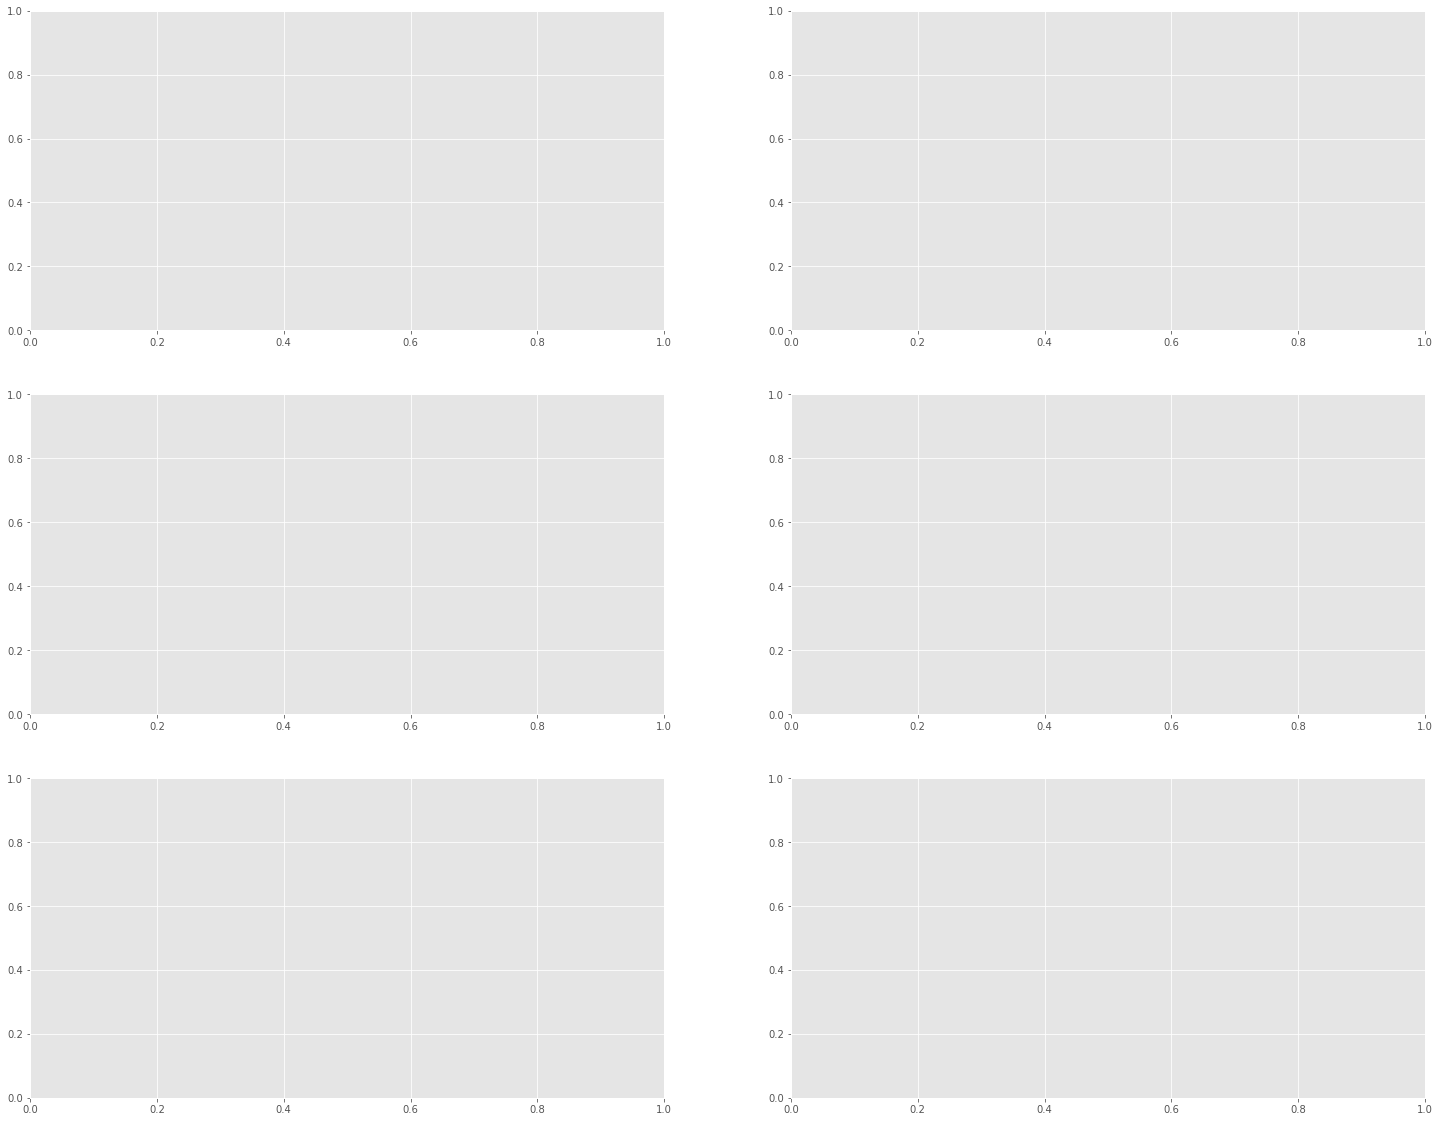

In [167]:
plt.subplots(figsize=(25, 20), ncols=2, nrows=3)


plt.subplot(3, 2, 1)
plt.pcolormesh(Tmld_init.lon.values, Tmld_init.lat.values, T_mld_summer)
plt.colorbar(extend='both').set_label('Temp [DegC]')
plt.ylabel('lat')
plt.xlabel('lon')
plt.plot(37.73555555555556,-46.8886111,"^",ms=15)
plt.title('Summer Mean Temperature',fontsize=12)

plt.subplot(3, 2, 3)
plt.pcolormesh(Tmld_init.lon.values, Tmld_init.lat.values, T_mld_winter)
plt.colorbar(extend='both').set_label('Temp [DegC]')
plt.ylabel('lat')
plt.xlabel('lon')
plt.plot(37.73555555555556,-46.8886111,"^",ms=15)
plt.title('Winter Mean Salinity',fontsize=12)

plt.subplot(3, 2, 5)
plt.pcolormesh(Tmld_init.lon.values, Tmld_init.lat.values, T_mld_summer-T_mld_winter)
plt.colorbar(extend='both').set_label('Temp [DegC]')
plt.ylabel('lat')
plt.xlabel('lon')
plt.plot(37.73555555555556,-46.8886111,"^",ms=15)
plt.title('Seasonal anomaly',fontsize=12)

plt.subplot(3, 2, 2)
plt.pcolormesh(Tmld_init.lon.values, Tmld_init.lat.values, S_mld_summer)
plt.colorbar(extend='both').set_label('Sal [g/kg]')
plt.ylabel('lat')
plt.xlabel('lon')
plt.plot(37.73555555555556,-46.8886111,"^",ms=15)
plt.title('Summer Mean Temperature',fontsize=12)

plt.subplot(3, 2, 4)
plt.pcolormesh(Tmld_init.lon.values, Tmld_init.lat.values, S_mld_winter)
plt.colorbar(extend='both').set_label('Sal [g/kg]')
plt.ylabel('lat')
plt.xlabel('lon')
plt.plot(37.73555555555556,-46.8886111,"^",ms=15)
plt.title('Winter Mean Salinity',fontsize=12)

plt.subplot(3, 2, 6)
plt.pcolormesh(Tmld_init.lon.values, Tmld_init.lat.values, S_mld_summer-S_mld_winter)
plt.colorbar(extend='both').set_label('Sal [g/kg]')
plt.ylabel('lat')
plt.xlabel('lon')
plt.plot(37.73555555555556,-46.8886111,"^",ms=15)
plt.title('Seasonal anomaly',fontsize=12)

Text(0.5,1,'% MLD present per cell within upper 1000m')

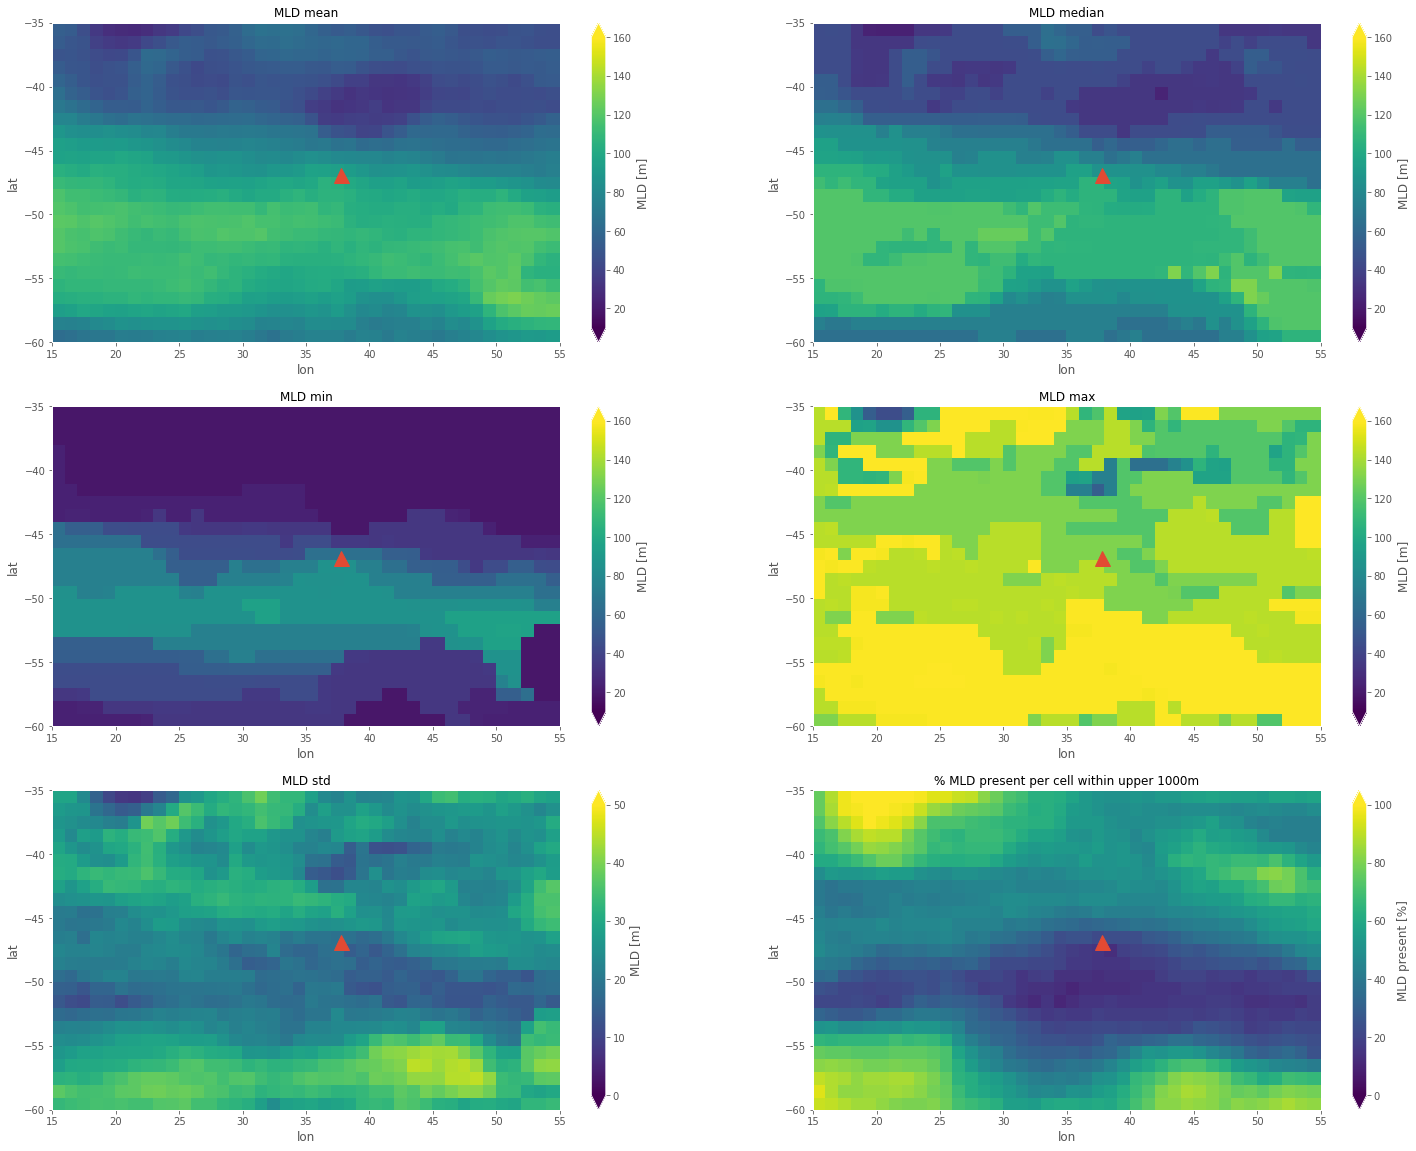

In [266]:
mean_mld = np.apply_along_axis(axis=0,arr=mld_gswda,func1d=np.nanmean)
median_mld = np.apply_along_axis(axis=0,arr=mld_gswda,func1d=np.nanmedian)
min_mld = np.apply_along_axis(axis=0,arr=mld_gswda,func1d=np.nanmin)
max_mld = np.apply_along_axis(axis=0,arr=mld_gswda,func1d=np.nanmax)
std_mld = np.apply_along_axis(axis=0,arr=mld_gswda,func1d=np.nanstd)
mld_present = 100-np.apply_along_axis(axis=0,arr=mld_gswda,func1d=np.isnan).sum(0)/84*100

plt.subplots(figsize=(25, 20))#, ncols=2, nrows=3)


plt.subplot(3, 2, 1)
#f1 = plt.figure(figsize=(10,5))
plt.pcolormesh(Tmld_init.lon.values, Tmld_init.lat.values, mean_mld, vmin=10, vmax=160)
plt.colorbar(extend='both').set_label('MLD [m]')
plt.ylabel('lat')
plt.xlabel('lon')
plt.plot(37.73555555555556,-46.8886111,"^",ms=15)
plt.title('MLD mean',fontsize=12)

plt.subplot(3, 2, 2)
#f1 = plt.figure(figsize=(10,5))
plt.pcolormesh(Tmld_init.lon.values, Tmld_init.lat.values, median_mld, vmin=10, vmax=160)
plt.colorbar(extend='both').set_label('MLD [m]')
plt.ylabel('lat')
plt.xlabel('lon')
plt.plot(37.73555555555556,-46.8886111,"^",ms=15)
plt.title('MLD median',fontsize=12)

plt.subplot(3, 2, 3)
#f1 = plt.figure(figsize=(10,5))
plt.pcolormesh(Tmld_init.lon.values, Tmld_init.lat.values, min_mld, vmin=10, vmax=160)
plt.colorbar(extend='both').set_label('MLD [m]')
plt.ylabel('lat')
plt.xlabel('lon')
plt.plot(37.73555555555556,-46.8886111,"^",ms=15)
plt.title('MLD min',fontsize=12)

plt.subplot(3, 2, 4)
#f1 = plt.figure(figsize=(10,5))
plt.pcolormesh(Tmld_init.lon.values, Tmld_init.lat.values, max_mld, vmin=10, vmax=160)
plt.colorbar(extend='both').set_label('MLD [m]')
plt.ylabel('lat')
plt.xlabel('lon')
plt.plot(37.73555555555556,-46.8886111,"^",ms=15)
plt.title('MLD max',fontsize=12)

plt.subplot(3, 2, 5)
#f1 = plt.figure(figsize=(10,5))
plt.pcolormesh(Tmld_init.lon.values, Tmld_init.lat.values, std_mld, vmin=0, vmax=50)
plt.colorbar(extend='both').set_label('MLD [m]')
plt.ylabel('lat')
plt.xlabel('lon')
plt.plot(37.73555555555556,-46.8886111,"^",ms=15)
plt.title('MLD std',fontsize=12)

plt.subplot(3, 2, 6)
#f1 = plt.figure(figsize=(10,5))
plt.pcolormesh(Tmld_init.lon.values, Tmld_init.lat.values, mld_present,vmin=0,vmax=100)
plt.colorbar(extend='both').set_label('MLD present [%]')
plt.ylabel('lat')
plt.xlabel('lon')
plt.plot(37.73555555555556,-46.8886111,"^",ms=15)
plt.title('% MLD present per cell within upper 1000m',fontsize=12)

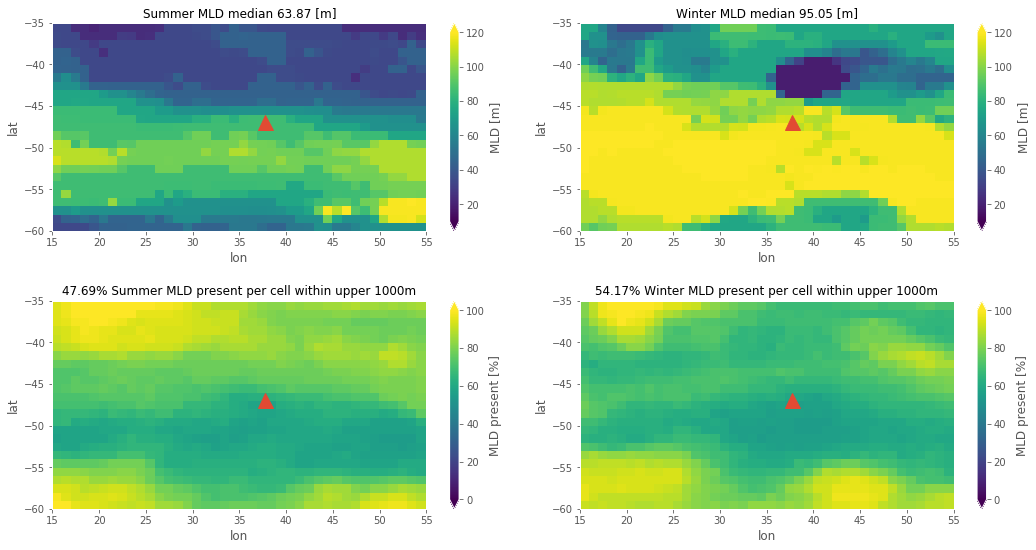

In [265]:
summer = [0, 1, 2, 9, 10, 11, 12, 13, 14,21, 22, 23, 24, 25, 26,33, 34, 35, 36, 37, 38,45, 46, 47, 48, 49, 50,57, 58, 59, 60, 61, 62,69, 70, 71, 72, 73, 74,81, 82, 83]
winter = [3,4,5,6,7,8,15,16,17,18,19,20,27,28,29,30,31,32,39,40,41,42,43,44,51,52,53,54,55,56,63,64,65,66,67,68,75,76,77,78,79,80]
mean_mld = np.apply_along_axis(axis=0,arr=mld_gswda,func1d=np.nanmean)
mld_gswda_summer = np.apply_along_axis(axis=0,arr=mld_gswda[summer],func1d=np.nanmedian)
mld_gswda_winter = np.apply_along_axis(axis=0,arr=mld_gswda[winter],func1d=np.nanmedian)
mld_present_summer = 100-np.apply_along_axis(axis=0,arr=mld_gswda[summer],func1d=np.isnan).sum(0)/84*100
mld_present_winter = 100-np.apply_along_axis(axis=0,arr=mld_gswda[winter],func1d=np.isnan).sum(0)/84*100
prop_mld_summer = np.apply_along_axis(axis=0,arr=mld_gswda[summer],func1d=np.isnan).sum()/size(mld_gswda[summer])*100
prop_mld_winter = np.apply_along_axis(axis=0,arr=mld_gswda[winter],func1d=np.isnan).sum()/size(mld_gswda[winter])*100

fig, ax = plt.subplots(figsize=(15, 8))#, ncols=2, nrows=3)

#plt.subplot(2, 3, 1)
#f1 = plt.figure(figsize=(10,5))
#plt.pcolormesh(Tmld_init.lon.values, Tmld_init.lat.values, mean_mld, vmin=10, vmax=120)
#plt.colorbar(extend='both').set_label('MLD [m]')
#plt.ylabel('lat')
#plt.xlabel('lon')
#plt.plot(37.73555555555556,-46.8886111,"^",ms=15)
#plt.title('MLD mean (2009-2015) '+"{:.2f}".format(np.nanmean(mean_mld))+' [m]',fontsize=12)

plt.subplot(2, 2, 1)
#f1 = plt.figure(figsize=(10,5))
plt.pcolormesh(Tmld_init.lon.values, Tmld_init.lat.values, mld_gswda_summer, vmin=10, vmax=120)
plt.colorbar(extend='both').set_label('MLD [m]')
plt.ylabel('lat')
plt.xlabel('lon')
plt.plot(37.73555555555556,-46.8886111,"^",ms=15)
plt.title('Summer MLD median '+"{:.2f}".format(np.nanmean(mld_gswda_summer))+' [m]',fontsize=12)

plt.subplot(2, 2, 2)
#f1 = plt.figure(figsize=(10,5))
plt.pcolormesh(Tmld_init.lon.values, Tmld_init.lat.values, mld_gswda_winter, vmin=10, vmax=120)
plt.colorbar(extend='both').set_label('MLD [m]')
plt.ylabel('lat')
plt.xlabel('lon')
plt.plot(37.73555555555556,-46.8886111,"^",ms=15)
plt.title('Winter MLD median '+"{:.2f}".format(np.nanmean(mld_gswda_winter))+' [m]',fontsize=12)

plt.subplot(2, 2, 3)
#f1 = plt.figure(figsize=(10,5))
plt.pcolormesh(Tmld_init.lon.values, Tmld_init.lat.values, mld_present_summer, vmin=0, vmax=100)
plt.colorbar(extend='both').set_label('MLD present [%]')
plt.ylabel('lat')
plt.xlabel('lon')
plt.plot(37.73555555555556,-46.8886111,"^",ms=15)
plt.title("{:.2f}".format(prop_mld_summer) + '% Summer MLD present per cell within upper 1000m',fontsize=12)

plt.subplot(2, 2, 4)
#f1 = plt.figure(figsize=(10,5))
plt.pcolormesh(Tmld_init.lon.values, Tmld_init.lat.values, mld_present_winter, vmin=0, vmax=100)
plt.colorbar(extend='both').set_label('MLD present [%]')
plt.ylabel('lat')
plt.xlabel('lon')
plt.plot(37.73555555555556,-46.8886111,"^",ms=15)
plt.title("{:.2f}".format(prop_mld_winter) + '% Winter MLD present per cell within upper 1000m',fontsize=12)

fig.tight_layout(pad=2.0)
fig.savefig('C:/Users/Sean Evans/Documents/2020/MSc/Computing/MSc/Plots & Dive Tables/Objective Analysis Data/pMLD.png',dpi=300)


### Seal1 overlap

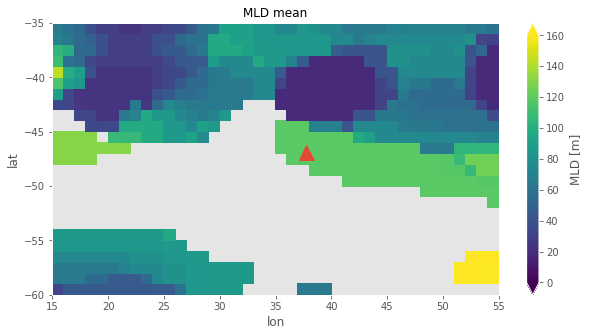

In [36]:
#%% Cannot define mld using first derivative of density anomaly because it does not always reach the threshold of 0.01 kg.m-3 

mean_mld = np.apply_along_axis(axis=0,arr=mld_gswda[3:5,:,:],func1d=np.nanmedian) 
f1 = plt.figure(figsize=(10,5))
plt.pcolormesh(Tmld_init.lon.values, Tmld_init.lat.values, mean_mld, vmin=0, vmax=160)
plt.colorbar(extend='both').set_label('MLD [m]')
plt.ylabel('lat')
plt.xlabel('lon')
plt.plot(37.73555555555556,-46.8886111,"^",ms=15)
plt.title('MLD mean',fontsize=12)
plt.show()

### Seal31 Overlap mld

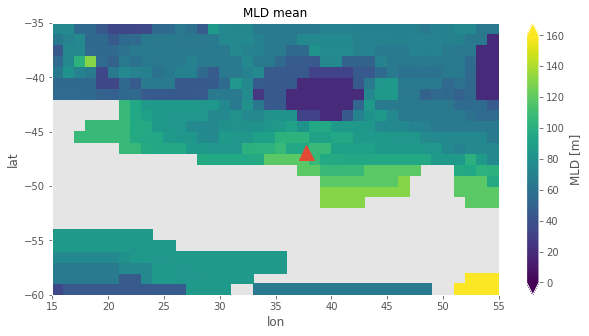

In [37]:
#%% Cannot define mld using first derivative of density anomaly because it does not always reach the threshold of 0.01 kg.m-3 

mean_mld = np.apply_along_axis(axis=0,arr=mld_gswda[63:70,:,:],func1d=np.nanmedian) 
f1 = plt.figure(figsize=(10,5))
plt.pcolormesh(Tmld_init.lon.values, Tmld_init.lat.values, mean_mld, vmin=0, vmax=160)
plt.colorbar(extend='both').set_label('MLD [m]')
plt.ylabel('lat')
plt.xlabel('lon')
plt.plot(37.73555555555556,-46.8886111,"^",ms=15)
plt.title('MLD mean',fontsize=12)
plt.show()

In [ ]:
plt.subplots(figsize=(35, 25))#, ncols=2, nrows=3)

#%% Temperature
plt.subplot(3, 4, 1)
plt.scatter(Tmld_init_gridded[0,:200,0,22]-273.15,-depth_out[:200])
plt.ylabel('Depth [m]')
plt.xlabel('Temp [DegC]')
plt.title('Gridded Temp @ lat=-60',fontsize=12)

plt.subplot(3, 4, 3)
plt.scatter((Tmld_init[0,:,0,22]-273.15)[:17],-depth_in[:17])
plt.ylabel('Depth [m]')
plt.xlabel('Temp [DegC]')
plt.title('Temp @ lat=-60',fontsize=12)

plt.subplot(3, 4, 5)
plt.scatter(Tmld_init_gridded[0,:200,25,22]-273.15,-depth_out[:200])
plt.ylabel('Depth [m]')
plt.xlabel('Temp [DegC]')
plt.title('Gridded Temp @ lat=-35',fontsize=12)

plt.subplot(3, 4, 7)
plt.scatter((Tmld_init[0,:,25,22]-273.15)[:17],-depth_in[:17])
plt.ylabel('Depth [m]')
plt.xlabel('Temp [DegC]')
plt.title('Temp @ lat=-35',fontsize=12)

plt.subplot(3, 4, 9)
plt.scatter(Tmld_init_gridded[0,:50,15,22]-273.15,-depth_out[:50])
plt.ylabel('Depth [m]')
plt.xlabel('Temp [DegC]')
plt.title('Gridded Temp @ lat=-45',fontsize=12)

plt.subplot(3, 4, 11)
plt.scatter((Tmld_init[0,:,15,22]-273.15)[:17],-depth_in[:17])
plt.ylabel('Depth [m]')
plt.xlabel('Temp [DegC]')
plt.title('Temp @ lat=-45',fontsize=12)

#%% Salinity
plt.subplot(3, 4, 2)
plt.scatter(Smld_init_gridded[0,:200,0,22],-depth_out[:200])
plt.ylabel('Depth [m]')
plt.xlabel('Sal [g/kg]')
plt.title('Gridded Sal @ lat=-60',fontsize=12)

plt.subplot(3, 4, 4)
plt.scatter((Smld_init[0,:,0,22])[:17],-depth_in[:17])
plt.ylabel('Depth [m]')
plt.xlabel('Sal [g/kg]')
plt.title('Sal @ lat=-60',fontsize=12)

plt.subplot(3, 4, 6)
plt.scatter(Smld_init_gridded[0,:200,25,22],-depth_out[:200])
plt.ylabel('Depth [m]')
plt.xlabel('Sal [g/kg]')
plt.title('Gridded Sal @ lat=-35',fontsize=12)

plt.subplot(3, 4, 8)
plt.scatter((Smld_init[0,:,25,22])[:17],-depth_in[:17])
plt.ylabel('Depth [m]')
plt.xlabel('Sal [g/kg]')
plt.title('Sal @ lat=-35',fontsize=12)

plt.subplot(3, 4, 10)
plt.scatter(Smld_init_gridded[0,:50,15,22],-depth_out[:50])
plt.ylabel('Depth [m]')
plt.xlabel('Sal [g/kg]')
plt.title('Gridded Sal @ lat=-45',fontsize=12)

plt.subplot(3, 4, 12)
plt.scatter((Smld_init[0,:,15,22])[:17],-depth_in[:17])
plt.ylabel('Depth [m]')
plt.xlabel('Sal [g/kg]')
plt.title('Sal @ lat=-45',fontsize=12)